# Предсказание cell viability

## Установка библиотек

In [1]:
!pip install catboost
#!pip install pymatgen

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor 

from sklearn.model_selection import GridSearchCV
#from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing


## Импорт данных

In [4]:
db_1 = pd.read_excel('Database_1.xlsx')
db_2 = pd.read_excel('Database_2.xlsx')
db_3 = pd.read_excel('Database_3.xlsx')
db_4 = pd.read_excel('Database_4.xlsx')
db_5 = pd.read_excel('Database_5.xlsx')

dbs = [db_1,  db_2, db_3, db_4, db_5]

In [5]:
# посмотрит на данные
for i in dbs:
    display(i.describe())
    display(len(i))

,Electronegativity,Ionic radius,Core size (nm),Hydro size (nm),Surface charge (mV),Surface area (m2/g),Cell type,Exposure dose (ug/mL),Number of atoms,Molecular weight (g/mol),Topological polar surface area (Å²),a (Å),b (Å),c (Å),α (°),β (°),γ (°),Density (g/cm3),Viability (%)
count,493.000000,493.000000,494.000000,493.000000,494.000000,493.000000,494.000000,494.000000,494.000000,493.000000,494.00000,493.000000,494.000000,493.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,1.973996,71.708114,27.789069,218.107708,11.357895,97.128600,0.508097,43.443117,3.787449,179.362117,34.68664,5.202714,5.713040,7.077325,83.076923,83.596154,91.943320,5.798239,182.074696
std,7.406795,16.689596,18.656805,65.540199,30.829307,159.753744,0.500441,63.028111,1.305848,101.260491,10.80140,2.635952,3.290484,3.776641,24.006552,24.252650,29.784024,2.210094,2255.100945
min,-1.200000,40.000000,11.800000,46.400000,-46.100000,13.000000,0.000000,0.400000,2.000000,60.080000,17.10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.000000
25%,1.300000,58.000000,13.100000,189.500000,-2.100000,25.900000,0.000000,3.200000,3.000000,79.545000,34.10000,4.171000,3.945000,5.132000,90.000000,90.000000,90.000000,5.070000,81.125000
50%,1.650000,73.000000,18.300000,222.000000,21.400000,44.000000,1.000000,12.500000,5.000000,159.690000,43.40000,4.920000,5.028000,5.420000,90.000000,90.000000,90.000000,6.310000,87.000000
75%,1.900000,80.000000,43.800000,261.600000,28.800000,93.100000,1.000000,50.000000,5.000000,277.640000,43.40000,5.410000,5.752000,10.118000,90.000000,90.000000,120.000000,6.750000,94.000000
max,165.000000,103.200000,71.800000,313.800000,61.900000,640.000000,1.000000,200.000000,5.000000,362.500000,43.40000,10.796000,12.460000,13.728000,90.000000,99.500000,120.000000,9.970000,50200.000000


494

,Diameter (nm),Concentration μM,Zeta potential (mV),Exposure time (h),% Cell viability,Publication year,Particle ID,Unnamed: 24
count,2896.000000,2.896000e+03,1261.000000,2896.000000,2896.000000,2896.000000,2896.000000,0.0
mean,125.082465,8.574635e+01,-1.963933,35.515539,75.208409,2010.821133,59.613605,NaN
std,171.931194,7.979487e+02,28.925259,27.950149,34.267026,2.609359,33.874291,NaN
min,1.000000,3.681525e-31,-48.000000,1.000000,-58.897640,2004.000000,1.000000,NaN
25%,20.000000,2.500000e-06,-27.000000,24.000000,54.219643,2009.000000,29.000000,NaN
50%,49.200000,5.000000e-04,-8.000000,24.000000,86.965674,2011.000000,57.000000,NaN
75%,165.000000,1.054755e-02,17.700000,48.000000,97.652370,2012.000000,88.000000,NaN
max,957.000000,1.500000e+04,87.000000,336.000000,404.811700,2015.000000,118.000000,NaN


2896

,No,Year,Diameter (nm),Size_in_Water (nm),Size_in_Medium (nm),Zeta_in_Medium (mV),No_of_Cells (cells/well),Time (hr),Concentration (ug/ml),Aspect_Ratio,Cell_Viability (%),PDI,Article_ID
count,4111.000000,4111.000000,3278.000000,2330.000000,1989.000000,1670.000000,3684.000000,4111.000000,3889.000000,380.000000,4111.000000,1000.000000,4111.000000
mean,2056.000000,2014.926539,47.337541,161.317318,201.079628,-11.847219,51227.415852,33.343225,152.849191,147.247079,110.738276,0.330952,75.413768
std,1186.887807,3.008173,62.051131,157.079816,202.080642,15.778892,119087.964430,20.676919,556.328787,493.111329,1550.655039,0.249619,44.821069
min,1.000000,2010.000000,1.150000,0.040000,1.900000,-63.310000,300.000000,1.000000,0.001000,0.100000,-86.410000,0.005000,1.000000
25%,1028.500000,2012.000000,14.300000,43.800000,77.000000,-20.670000,10000.000000,24.000000,8.000000,3.525000,57.903500,0.148000,37.000000
50%,2056.000000,2015.000000,28.200000,112.700000,142.000000,-11.600000,10000.000000,24.000000,40.000000,11.800000,85.280000,0.241000,77.000000
75%,3083.500000,2018.000000,50.000000,203.300000,222.000000,-7.700000,50000.000000,48.000000,100.000000,37.900000,97.263500,0.518000,116.000000
max,4111.000000,2020.000000,500.000000,889.030000,1262.330000,56.000000,1000000.000000,96.000000,14015.200000,3333.000000,85775.000000,0.895000,152.000000


4111

,Electronegativity,Ionic radius,Core size (nm),Hydro size (nm),Surface charge (mV),Surface area (m2/g),Cell type,Exposure dose (ug/mL),Number of atoms,Molecular weight (g/mol),Topological polar surface area (Å²),Viability (%)
count,1068.000000,1068.000000,1066.000000,1066.000000,1066.000000,1067.000000,1068.000000,1067.000000,1065.000000,1065.000000,491.000000,1068.000000
mean,1.627640,69.855899,42.653096,370.466510,2.679081,86.357451,0.598315,135.105081,3.293897,131.307696,34.740530,82.019563
std,0.232853,12.994941,83.395909,320.504097,30.465936,133.215302,0.490469,3061.213397,1.322524,86.174042,10.768672,26.309820
min,1.100000,40.000000,5.900000,10.000000,-47.600000,0.000000,0.000000,0.000000,2.000000,60.080000,17.100000,-3.873900
25%,1.540000,68.000000,18.300000,208.300000,-11.700000,21.800000,0.000000,1.600000,2.000000,79.866000,34.100000,80.000000
50%,1.650000,71.000000,28.400000,273.400000,-2.100000,42.500000,1.000000,12.500000,3.000000,81.380000,43.400000,90.000000
75%,1.830000,74.000000,51.125000,335.750000,27.600000,93.100000,1.000000,50.000000,5.000000,159.690000,43.400000,97.000000
max,2.050000,103.200000,2500.000000,1843.000000,363.000000,640.000000,1.000000,100000.000000,7.000000,362.500000,43.400000,151.111100


1068

,core_size,hydro_size,surf_charge,surf_area,time,dose,viability
count,572.000000,574.000000,573.000000,574.000000,574.000000,574.000000,574.000000
mean,50.889510,500.526429,-5.452705,77.222125,24.310105,39.717458,82.565494
std,42.767871,387.447810,23.449816,104.430464,18.068843,95.312219,30.392059
min,0.000000,6.870000,-47.600000,7.000000,3.000000,0.000000,-3.873900
25%,25.000000,267.000000,-12.100000,20.000000,12.000000,1.000000,74.013675
50%,35.600000,320.000000,-10.700000,40.000000,24.000000,12.500000,93.821050
75%,60.000000,675.250000,1.700000,82.800000,24.000000,50.000000,100.494550
max,369.000000,1843.000000,42.800000,576.230000,72.000000,1440.000000,151.111100


574

У нас есть 5 таблиц с разным набором признаков в каждой. Нужно переименовать признаки в каждом из датафреймов и объединить их.

### Переименование столбцов

In [6]:
db_1.columns

Index(['Material type', 'Elements', 'Electronegativity', 'Ionic radius',
       'Core size (nm)', 'Hydro size (nm)', 'Surface charge (mV)',
       'Surface area (m2/g)', 'Cell type', 'Exposure dose (ug/mL)',
       'Number of atoms', 'Molecular weight (g/mol)',
       'Topological polar surface area (Å²)', 'a (Å)', 'b (Å)', 'c (Å)',
       'α (°)', 'β (°)', 'γ (°)', 'Density (g/cm3)', 'Viability (%)'],
      dtype='object')

In [7]:
# Переименуем  названия столбцов
db_1.rename(columns={'Elements': 'elements', 
                     'Electronegativity': 'electronegativity',
                     'Ionic radius': 'ionic_radius',
                     'Core size (nm)' : 'core_size',
                     'Hydro size (nm)' : 'size_in_water', 
                     'Surface charge (mV)': 'surface_charge',
                     'Surface area (m2/g)': 'surface_area',
                     'Cell type': 'cell_type', 
                     'Exposure dose (ug/mL)': 'concentration', 
                     'Number of atoms': 'number_of_atoms',
                     'Molecular weight (g/mol)': 'mw',
                     'Topological polar surface area (Å²)': 'tps',
                    'a (Å)': 'a', 'b (Å)':'b', 'c (Å)':'c', 'α (°)': 'alpha', 'β (°)':'beta', 'γ (°)':'gama', 
                     'Density (g/cm3)': 'density',
       'Viability (%)': 'viability', 'Material type':'material'}, inplace=True)

In [8]:
# Удалим заведомо ненужные
db_2 = db_2.drop([ 'Publication year', 'Particle ID', 'Reference DOI', 
           'Unnamed: 24'], axis=1)
db_2.rename(columns={'Nanoparticle': 'material', 
                     'Type: Organic (O)/inorganic (I)': 'type_inorganic',
                     'coat':'coat',
                    'Diameter (nm)': 'diameter',
                     'Concentration μM':'concentration',
                     'Zeta potential (mV)':'surface_charge',
                     'Cells':'cell_type',
                   'Cell line (L)/primary cells (P)':'cell_line',
                     'Human(H)/Animal(A) cells':'human',
                   'Animal?':'animal',
                     'Cell morphology':'cell_morphology', 
                     'Cell age: embryonic (E), Adult (A)':'cell_age',
                      'Cell-organ/tissue source':'source',
                     'Exposure time (h)':'exposure_time',
                     'Colloidal stability checked (Y/N)':'colloidal_stability',
                     'Interference checked (Y/N)': 'interference',
                     'Positive control (Y/N)':'positive_control',
                     '% Cell viability':'viability',
                     'Test':'test',
                     'Test indicator':'test_indicator',
                     'Biochemical metric':'biochemical_metric'
                    }, inplace=True
    
            )

In [9]:
db_3 = db_3.drop(['No', 'Year', 'PDI', 'Article_ID', 'DOI'], axis=1)
db_3.rename(columns={'Material':'material',
                     'Type':'type_inorganic', 
                     'Shape':'shape',
                     'Coat/Functional Group':'coat',
                    'Synthesis_Method':'synthesis_method',
                     'Surface_Charge':'surfacecharge', 
                     'Diameter (nm)':'diameter',
                   'Size_in_Water (nm)': 'size_in_water', 
                     'Size_in_Medium (nm)':'size_in_medium',
                     'Zeta_in_Water (mV)':'surface_charge',
                   'Zeta_in_Medium (mV)':'zeta_in_medium',
                     'Cell_Type':'cell_type',
                     'No_of_Cells (cells/well)':'number_of_cells',
                   'Human_Animal':'human', 
                     'Cell_Source':'animal',
                     'Cell_Tissue':'source', 
                     'Cell_Morphology':'cell_morphology',
                   'Cell_Age':'cell_age',
                     'Cell Line_Primary Cell':'cell_line',
                     'Time (hr)':'exposure_time',
                   'Concentration (ug/ml)':'concentration',
                     'Test':'test',
                     'Test_Indicator':'test_indicator',
                     'Aspect_Ratio':'aspect_ratio',
                   'Cell_Viability (%)':'viability'
                    }, inplace=True
    
            )
# Нечисленные значения
db_3.drop('surfacecharge', axis=1)


,material,type_inorganic,shape,coat,synthesis_method,diameter,size_in_water,size_in_medium,surface_charge,zeta_in_medium,...,source,cell_morphology,cell_age,cell_line,exposure_time,concentration,test,test_indicator,aspect_ratio,viability
0,SiO2,I,Sphere,CTAB,Precipitation,NaN,386.9,90.09,-35.9,NaN,...,Adrenal Gland,Irregular,Adult,L,12,1.95,MTT,TetrazoliumSalt,NaN,113.670
1,SiO2,I,Sphere,CTAB,Precipitation,NaN,386.9,90.09,-35.9,NaN,...,Adrenal Gland,Irregular,Adult,L,12,3.90,MTT,TetrazoliumSalt,NaN,97.265
2,SiO2,I,Sphere,CTAB,Precipitation,NaN,386.9,90.09,-35.9,NaN,...,Adrenal Gland,Irregular,Adult,L,12,7.80,MTT,TetrazoliumSalt,NaN,10873.000
3,SiO2,I,Sphere,CTAB,Precipitation,NaN,386.9,90.09,-35.9,NaN,...,Adrenal Gland,Irregular,Adult,L,12,15.60,MTT,TetrazoliumSalt,NaN,98.451
4,SiO2,I,Sphere,CTAB,Precipitation,NaN,386.9,90.09,-35.9,NaN,...,Adrenal Gland,Irregular,Adult,L,12,31.20,MTT,TetrazoliumSalt,NaN,98.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,Polystyrene,O,Sphere,NH2,Miniemulsion Polymerization,NaN,NaN,113.00,NaN,56.0,...,Blood,Monocyte,Adult,L,48,0.01,XTT,TetrazoliumSalt,NaN,100.000
4107,Polystyrene,O,Sphere,NH2,Miniemulsion Polymerization,NaN,NaN,113.00,NaN,56.0,...,Blood,Monocyte,Adult,L,48,0.10,XTT,TetrazoliumSalt,NaN,114.570
4108,Polystyrene,O,Sphere,NH2,Miniemulsion Polymerization,NaN,NaN,113.00,NaN,56.0,...,Blood,Monocyte,Adult,L,48,1.00,XTT,TetrazoliumSalt,NaN,119.650
4109,Polystyrene,O,Sphere,NH2,Miniemulsion Polymerization,NaN,NaN,113.00,NaN,56.0,...,Blood,Monocyte,Adult,L,48,10.00,XTT,TetrazoliumSalt,NaN,117.220


In [10]:
db_4.rename(columns={'Material type':'material',
                     'Elements':'elements',
                     'Electronegativity':'electronegativity',
                     'Ionic radius':'ionic_radius',
                     'Core size (nm)':'core_size',
                     'Hydro size (nm)':'size_in_water',
                     'Surface charge (mV)':'surface_charge',
                     'Surface area (m2/g)':'surface_area',
                     'Cell type':'cell_type',
                     'Exposure dose (ug/mL)':'concentration',
                     'Number of atoms':'number_of_atoms',
                     'Molecular weight (g/mol)':'mw',
                     'Topological polar surface area (Å²)':'tps',
                     'a (Å)':'a', 'b (Å)':'b', 'c (Å)':'c',
                     'α (°)':'alpha', 'β (°)':'beta', 'γ (°)':'gama',
                     'Density (g/cm3)':'density',
                     'Viability (%)':'viability'
                    }, inplace=True
            )

In [11]:
db_5.rename(columns={
                     'core_size':'core_size',
                     'hydro_size':'size_in_water',
                     'surf_charge':'surface_charge',
                     'surf_area':'surface_area',
                    'cell_line':'cell_line',
                     'cell_species':'animal',
                     'cell_origin':'source',
                     'cell_type':'cell_type',
                     'time':'exposure_time',
                     'dose':'concentration'
                    }, inplace=True
    
            )

## Предобработка данных

## Database_1

In [12]:
display(db_1.info())
print(db_1.material.unique())
print(db_1.elements.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   material           494 non-null    object 
 1   elements           494 non-null    object 
 2   electronegativity  493 non-null    float64
 3   ionic_radius       493 non-null    float64
 4   core_size          494 non-null    float64
 5   size_in_water      493 non-null    float64
 6   surface_charge     494 non-null    float64
 7   surface_area       493 non-null    float64
 8   cell_type          494 non-null    int64  
 9   concentration      494 non-null    float64
 10  number_of_atoms    494 non-null    int64  
 11  mw                 493 non-null    float64
 12  tps                494 non-null    float64
 13  a                  493 non-null    float64
 14  b                  494 non-null    float64
 15  c                  493 non-null    float64
 16  alpha              494 non

None

['CuO' 'ZnO' 'Mn2O3' 'CoO' 'CeO2' 'Fe2O3' 'Gd2O3' 'HfO2' 'In2O3' 'La2O3'
 'NiO' 'Sb2O3' 'SiO2' 'Al2O3']
['Cu' 'Zn' 'Mn' 'Co' 'cobalt' 'Ce' 'Fe' 'Gd' 'Hf' 'In' 'La' 'Ni' 'Sb' 'Si'
 'Al' 'Iron']


In [13]:
db_1.elements = db_1.elements.replace({'cobalt': 'Co', 'Iron':'Fe'})

В первой таблице все материалы неорганические- создадим соответствующий признак, а большинство прризнаков - числовые, нужно посмотреть из распределение

material
elements
electronegativity
ionic_radius
core_size
size_in_water
surface_charge
surface_area
cell_type
concentration
number_of_atoms
mw
tps
a
b
c
alpha
beta
gama
density
viability


<ipython-input-14-cfd8ee2ad49a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


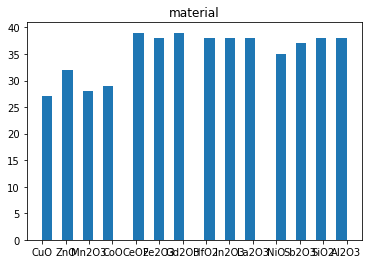

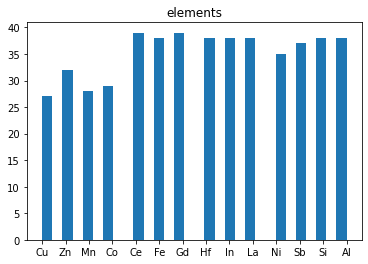

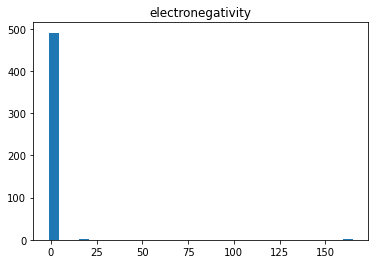

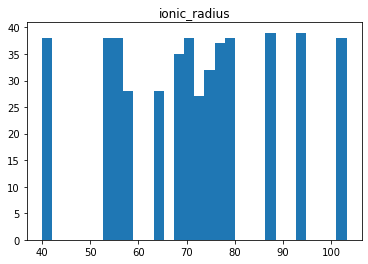

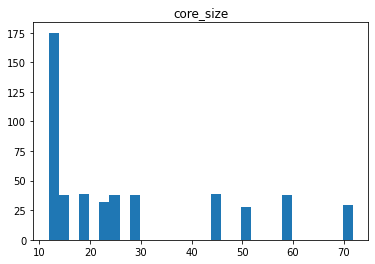

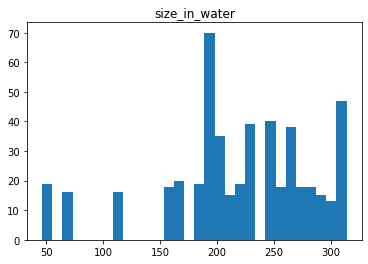

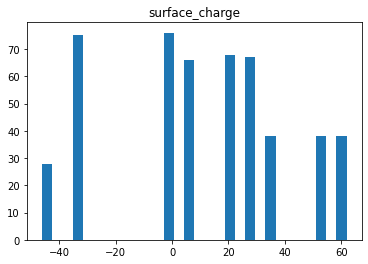

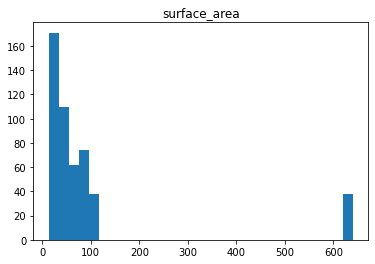

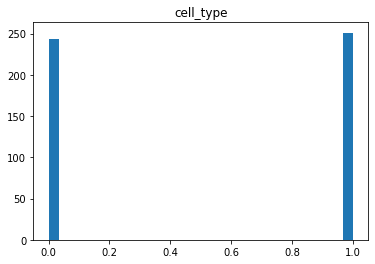

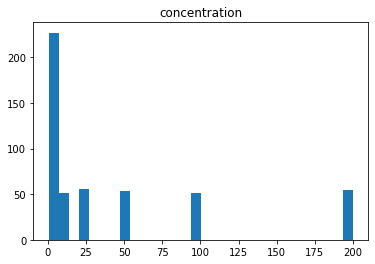

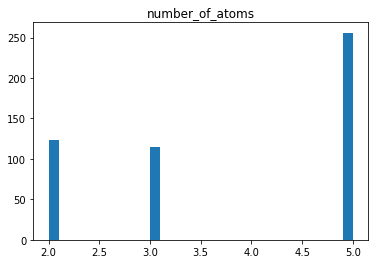

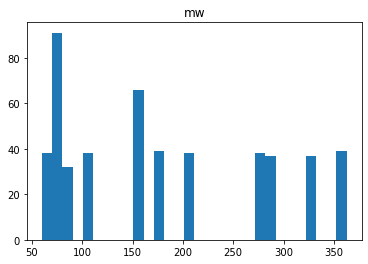

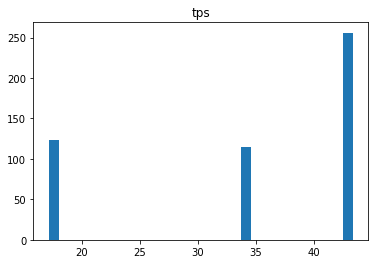

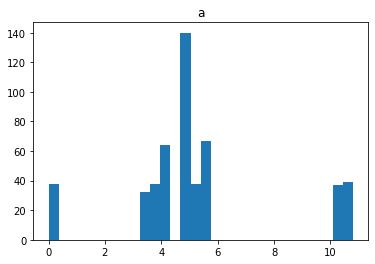

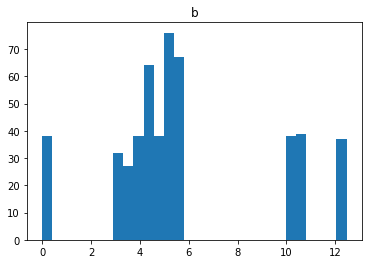

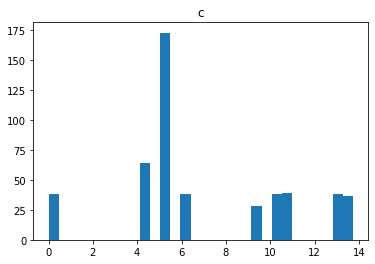

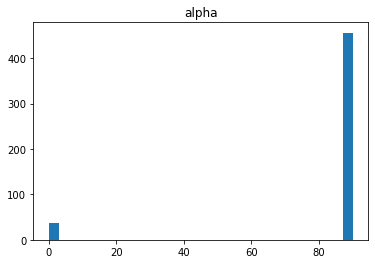

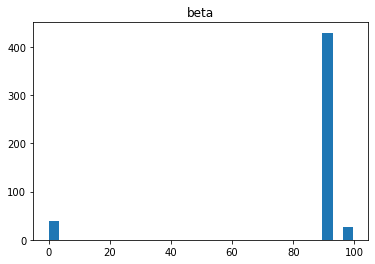

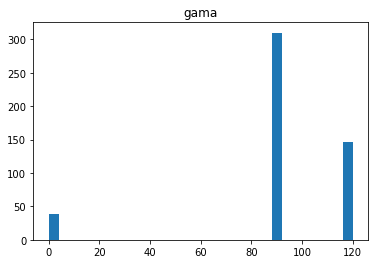

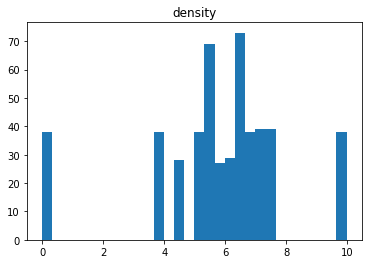

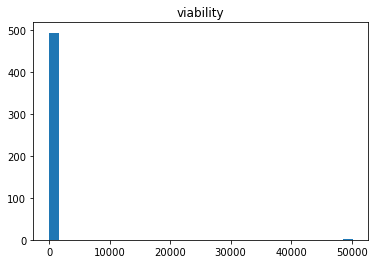

In [14]:
#построим распределение числовых признаков
for i in db_1.columns:
    print(i)
    plt.figure()
    plt.hist(db_1[i], bins=30)
    plt.title(i)

In [15]:
#Создадим признак
db_1.type_inorganic = 1

Elmements - почти равномерно представлены
Electronegativity - в основном, все значения около 0, но есть как минимум еще несколько объектов со значениямиоколо 170 и 20
Ionic radius, Core_size(nm), size_in_water, Surface_charge, Exposure_dose, Number of atoms, Mw, Tps, density, -  без выбровов
Surface area (m2/g - подозрительные ззначения в обрасти 600, но их много. Нужно с осторожностью
 Viability - есть выбросы  около 50000.


<AxesSubplot:>

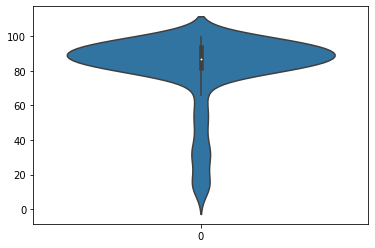

In [16]:
#Viability > 0
db_1.viability = db_1.viability[db_1['viability']<10000]
db_1.viability = db_1.viability.abs()
sns.violinplot(data=db_1.viability)

### Database_2

In [17]:
db_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   material             2896 non-null   object 
 1   type_inorganic       2896 non-null   object 
 2   coat                 1052 non-null   object 
 3   diameter             2896 non-null   float64
 4   concentration        2896 non-null   float64
 5   surface_charge       1261 non-null   float64
 6   cell_type            2896 non-null   object 
 7   cell_line            2896 non-null   object 
 8   human                2896 non-null   object 
 9   animal               651 non-null    object 
 10  cell_morphology      2895 non-null   object 
 11  cell_age             2895 non-null   object 
 12  source               2896 non-null   object 
 13  exposure_time        2896 non-null   int64  
 14  test                 2895 non-null   object 
 15  test_indicator       2895 non-null   o

In [18]:
print(db_2.material.unique())

['CeO2' 'Se' 'CuO' 'Copper Oxide' 'CuS' 'ZnO' 'Zinc oxide' 'Iron oxide'
 'TiO2' 'Ti' 'Cr' 'Co' 'Co3O4' 'CdO' 'MnO' 'Bi' 'Mo' 'Pt' 'Hydroxyapatite'
 'Cu2O' 'MgO' 'Al2O3' 'QDs' 'SiO2' 'Au' 'Ag' 'Eudragit RL' 'Dendrimer'
 'PLGA' 'Polystyrene' 'Liposomes' 'SLN' 'Carbon Nanotubes' 'Carbon NP'
 'Chitosan']


In [19]:
print(len(db_2[db_2['material'] =='Zinc oxide']))
print(len(db_2[db_2['material'] =='Copper Oxide']))
print(len(db_2[db_2['material'] =='Iron oxide']))

1
1
490


In [20]:
# удалим непонятные оксиды меди и цинка
db_2 = db_2[db_2.material != "Copper Oxide"]
db_2 = db_2[db_2.material != "Zinc oxide"]

In [21]:
# Заменим оксид железа на Fe3O4 (проведен поиск: статья - ссылка на реактив - сайт произволителя реактива)
db_2.material = db_2.material.replace({'Iron oxide': 'Fe3O4',
                                     'Eudragit RL':'EudragitRL'})

In [22]:
# проверим уникальные значения нечисловых признаков и заменим на 0 и 1, где это допустимо
db_2.interference.unique()
db_2.interference = db_2.interference.apply(
    lambda x: 1 if x=='Y' else 0)

In [23]:
db_2.colloidal_stability.unique()
db_2.colloidal_stability = db_2.colloidal_stability.apply(
    lambda x: 1 if x=='Y' else 0)

In [24]:
db_2.positive_control.unique()
db_2.positive_control = db_2.positive_control.apply(
    lambda x: 1 if x=='Y' else 0)

In [25]:
db_2['type_inorganic'] = db_2['type_inorganic'].apply(
    lambda x: 1 if x=='I' else 0)


In [26]:
db_2.concentration = db_2.concentration[db_2.concentration < 1000] 

In [27]:
db_2.cell_line.unique()
db_2.cell_line = db_2.cell_line.apply(
    lambda x: 1 if x=='L' else 0)

In [28]:
print(db_2.human.unique())
db_2.human = db_2.human.apply(lambda x: 1 if x=='H' else 0)

['A' 'H']


In [29]:
# Запишем единообразно
print(db_2.animal.unique())
db_2.animal = db_2.animal.replace({'Mouse': 'mouse',
                                   'Mice': 'mouse',
                                   'Rat': 'rat',
                                   'Pig': 'pig',
                                   'Monkey (Cercopithecus aethiops)': 'monkey',
                                   'Canine':'canine',
                                   'Cow, Bos taurus':'cow'
                                  })
print(db_2.animal.unique())

['Mouse' nan 'Rat' 'Pig' 'Monkey (Cercopithecus aethiops)' 'Canine'
 'hamster' 'rat' 'Cow, Bos taurus' 'Mice']
['mouse' nan 'rat' 'pig' 'monkey' 'canine' 'hamster' 'cow']


In [30]:
db_2.cell_age.unique()
#db_2.cell_age = db_2.cell_age.replace({'E': 1, 'A': 0})
db_2.cell_age.unique()

array(['A', 'E', nan], dtype=object)

In [31]:
#Проверим, сколько уникальных значений
#Получилось много и без опкчаток - не изменяем
print(db_2.source.unique())
print(db_2.test.unique())
print(db_2['test_indicator'].unique())
print(db_2['biochemical_metric'].unique())

['Areolar tissue' 'Prostate' 'Lung' 'Heart' 'Bone Marrow' 'Brain' 'Kidney'
 'Skin' 'Blood' 'Colon' 'Ovary' 'Cervix' 'embryo' 'liver'
 'pituitary gland' 'Breast' 'Aorta' 'Bone' 'Foreskin' 'Adrenal gland'
 'kidney' 'Umbilical cord' 'stomach' 'Testis' 'Bone marrow'
 'axillary lymph node' 'adrenal gland' 'lung' 'Urinary bladder' 'Liver']
['MTT' 'XTT' 'NR' nan 'LDH' 'MTS' 'Live/Dead' 'WST\xad1'
 'CellTiter\xadBlue' 'CellTiter\xadGlo' 'CellTiter\xadBlue ' 'ATPLite'
 'Alamar Blue' 'Alamar blue' 'ATP' 'WST\xad8' 'Resazurin'
 'ApoTox\xadGlo™ Triplex' 'CytoTox\xadOne™' 'Vialight'
 'Promegas CTB Assay'
 'Modified MTT assay (MTT\xadformazan ppt dissolving by ethanol)'
 'Modified MTT assay (MTT\xadformazan ppt dissolving by isopropanol/HCl)'
 'Live/Dead ']
['tetrazolium salt' 'toluylene red' 'LDH activity assay kit'
 'Calcein AM, Ethidium homodimer-1' nan 'Sytox Red' 'Annexin V'
 'propidium iodide' 'trypan blue' 'Alamar blue' 'luciferase'
 'propidium iodide, Annexin V' 'Caspase-Glo® 3/7 Reagent' 'T

In [32]:
col_cat = ['type_inorganic', 'coat', 'cells',
       'cell_line', 'human',
       'animal', 'cell_morphology', 'cell_age',
       'source', 'Test',
       'Test indicator', 'Biochemical metric', 'material']
col_num = ['diameter', 'concentration', 'surface_charge', 'exposure_time', 'viability']

diameter
concentration
surface_charge
exposure_time
viability


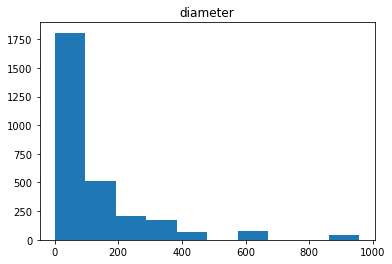

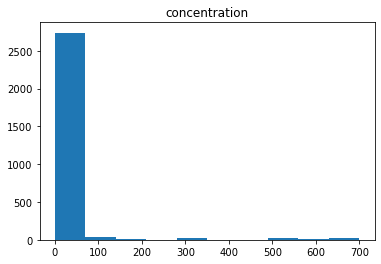

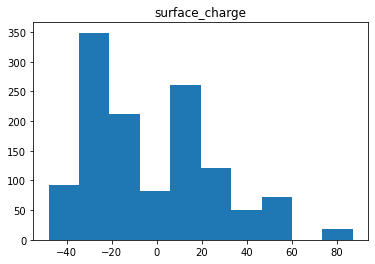

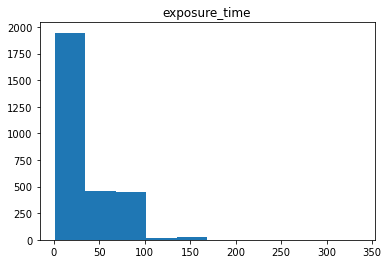

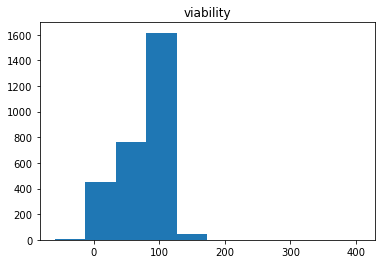

In [33]:
#нарисуем распределение числовых признаков
for i in col_num:
    print(i)
    plt.figure()
    plt.hist(db_2[i])
    plt.title(i)

'Diameter' - есть почти микрометровые частицы. Немного подозрительно

'Concentration' - есть выбросы с лишними 0 (должно быть на 2 или 3 порядка ниже). Во избежание ошибок, удалим

'surface_charge'- ок, но мало данных

'Exposure time'- ок

'viability' должно быть > 0

<AxesSubplot:>

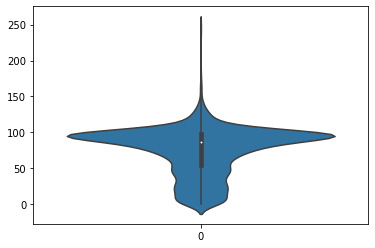

In [34]:
db_2.viability = db_2['viability'][db_2['viability']<300]
db_2.viability = db_2.viability.abs()

sns.violinplot(data=db_2.viability)

In [35]:
db_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894 entries, 0 to 2895
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   material             2894 non-null   object 
 1   type_inorganic       2894 non-null   int64  
 2   coat                 1052 non-null   object 
 3   diameter             2894 non-null   float64
 4   concentration        2855 non-null   float64
 5   surface_charge       1260 non-null   float64
 6   cell_type            2894 non-null   object 
 7   cell_line            2894 non-null   int64  
 8   human                2894 non-null   int64  
 9   animal               651 non-null    object 
 10  cell_morphology      2893 non-null   object 
 11  cell_age             2893 non-null   object 
 12  source               2894 non-null   object 
 13  exposure_time        2894 non-null   int64  
 14  test                 2893 non-null   object 
 15  test_indicator       2893 non-null   o

## Database_3

In [36]:
db_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   material          4111 non-null   object 
 1   type_inorganic    4111 non-null   object 
 2   shape             4111 non-null   object 
 3   coat              4110 non-null   object 
 4   synthesis_method  4111 non-null   object 
 5   surfacecharge     3112 non-null   object 
 6   diameter          3278 non-null   float64
 7   size_in_water     2330 non-null   float64
 8   size_in_medium    1989 non-null   float64
 9   surface_charge    2487 non-null   object 
 10  zeta_in_medium    1670 non-null   float64
 11  cell_type         4111 non-null   object 
 12  number_of_cells   3684 non-null   float64
 13  human             4111 non-null   object 
 14  animal            4110 non-null   object 
 15  source            4111 non-null   object 
 16  cell_morphology   4111 non-null   object 


In [37]:
#Признак 'aspect ratio', 'zeta_in_medium' можно удалить, т.к. значений очень немного
db_3= db_3.drop(['aspect_ratio', 'zeta_in_medium', 'surfacecharge'], axis=1)

In [38]:
col_cat_3 = ['material', 'type_inorganic', 'shape', 'coat', 'synthesis_method', 'surface_charge', 'cell_type', 'human', 
          'source', 'cell_morphology', 'cell_age', 'cell_line', 'test', 'test_indicator']
for col in col_cat_3:
    print(col)
    print(db_3[col].unique())

material
['SiO2' 'QD' 'IronOxide' 'Bi' 'Au' 'Ag' 'TiO2' 'Dendrimer' 'Dendrmer'
 'PLGA' 'Alginate' 'PTFE-PMMA' 'ZnO' 'Pt' 'CuO' 'CeO2' 'Co3O4' 'MWCNT'
 'HAP' 'MgO' 'Polystyrene' 'Ni' 'Chitosan' 'Al2O3' 'SLN' 'EudragitRL'
 'Carbon' 'ZrO2' 'C60' 'C70' 'SWCNT' 'Diamond' 'Graphite' 'Fe2O3'
 'IronOide' 'NiO' 'Ay' 'Cu' 'Ce O2' 'Bi2O3']
type_inorganic
['I' 'O' 'C' 0]
shape
['Sphere' 'Sphee' 'Irregular' 'Iregular' 'Lentil' 'Sph/Tri/Hex' 'Rod'
 'Star' 'Sph/Rho/Rod' 'Rho/Sph' 'Rho/Qua' 'Nanotube' 'Sph/Hex/Ova' 'Wire'
 'Needle' 'Hexagon' 'Round' 'Cubic']
coat
['CTAB' 'Ph' 'NH2' 'None' 'DPA' 'MPA' 'CyA' 'Dextran' 'PEG' 'Silica' 'CKK'
 'PVP' 'Ac' 'C12' 'OH' 'OS' 'SC' 'Chitosan' 'Poloxamer' 'PVA' 'PEA'
 'PEG-FA' 'Silica-FA' 'SodiumAlginate' 'Citrate' 'Liposome' 'OleicAcid'
 'Silica-NH2' 'COOH' 'DMSA' 'MSA' 'CYS' 'GSH' 'PAMAM' 'Urea' 'DPPC' 'DHLA'
 'PEI' 'FA' 'DDAB' 'Tween80' 'Citrate-Lactose' 'Citrate-Oligonucleotide'
 nan 'CH3' 'AscorbicAcid']
synthesis_method
['Precipitation' 'Commercial' 'Thermal 

In [39]:
# Оксид железа и опечатки (по статьям)
db_3.material = db_3.material.replace({'IronOide':'Fe3O4',
                                      'IronOxide':'Fe3O4',
                                      'Dendrmer':'Dendrimer',
                                      'QD':'QDs',
                                      'Ay':'Au', 'CeO2':'Ce'})

In [40]:
db_3.type_inorganic = db_3.type_inorganic.apply(
    lambda x: 1 if x in ['I', 'C'] else 0)
db_3.surface_charge = db_3.surface_charge.replace("15O",150)
db_3.human = db_3.human.apply(
    lambda x: 1 if x in ['H'] else 0)
db_3.cell_age = db_3.cell_age.replace({'Adult':'A',
                                      'Embryonic':'E',
                                      'Fetus':'F'})
db_3.cell_line = db_3.cell_line.apply(
    lambda x: 1 if x in ['L'] else 0)
db_3['type_inorganic'] = db_3['type_inorganic'].astype('int')

In [41]:
db_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   material          4111 non-null   object 
 1   type_inorganic    4111 non-null   int32  
 2   shape             4111 non-null   object 
 3   coat              4110 non-null   object 
 4   synthesis_method  4111 non-null   object 
 5   diameter          3278 non-null   float64
 6   size_in_water     2330 non-null   float64
 7   size_in_medium    1989 non-null   float64
 8   surface_charge    2487 non-null   float64
 9   cell_type         4111 non-null   object 
 10  number_of_cells   3684 non-null   float64
 11  human             4111 non-null   int64  
 12  animal            4110 non-null   object 
 13  source            4111 non-null   object 
 14  cell_morphology   4111 non-null   object 
 15  cell_age          4111 non-null   object 
 16  cell_line         4111 non-null   int64  


diameter
size_in_water
size_in_medium
exposure_time
concentration
viability
surface_charge


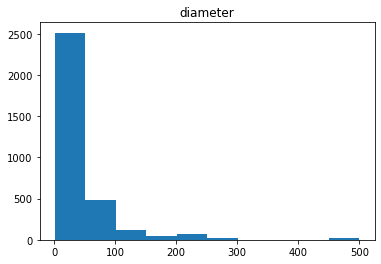

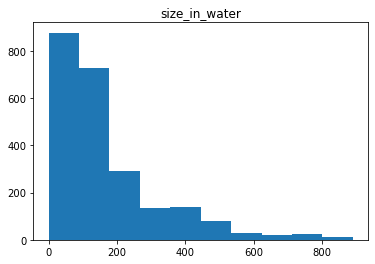

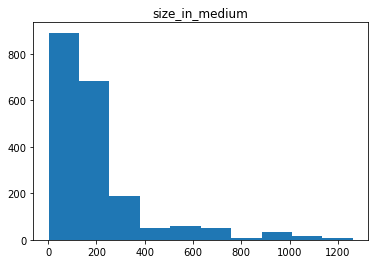

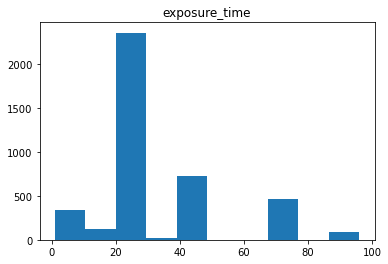

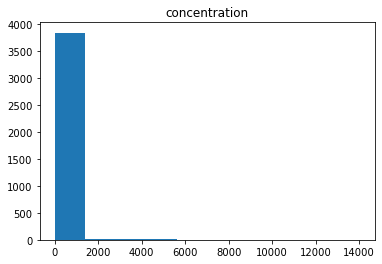

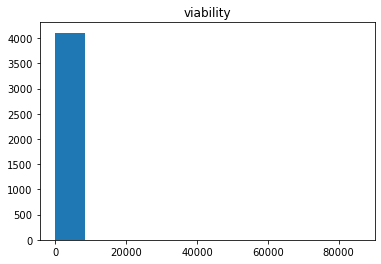

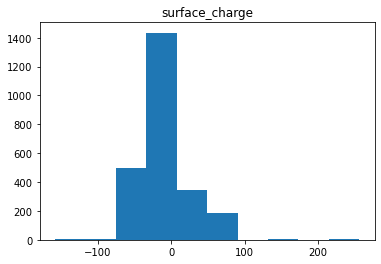

In [42]:
col_num_3=['diameter', 'size_in_water','size_in_medium', 
            'exposure_time', 'concentration', 'viability', 'surface_charge']
for i in col_num_3:
    print(i)
    plt.figure()
    plt.hist(db_3[i])
    plt.title(i)

Подозрительные значения встречаются в признаке viability и concentration. 

<AxesSubplot:>

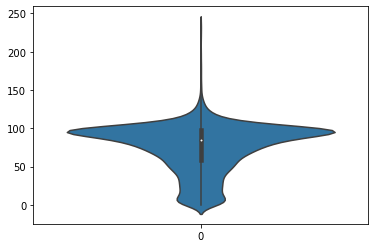

In [43]:
db_3.viability = db_3['viability'][db_3['viability']<1000]
db_3.viability = db_3.viability.abs()
sns.violinplot(data=db_3.viability)

<AxesSubplot:>

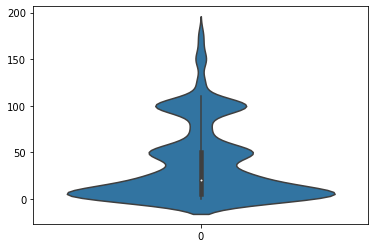

In [44]:
db_3.concentration = db_3['concentration'][db_3['concentration']<200]
sns.violinplot(data=db_3.concentration)

### Database_4

In [45]:
db_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   material           1066 non-null   object 
 1   elements           1068 non-null   object 
 2   electronegativity  1068 non-null   float64
 3   ionic_radius       1068 non-null   float64
 4   core_size          1066 non-null   float64
 5   size_in_water      1066 non-null   float64
 6   surface_charge     1066 non-null   float64
 7   surface_area       1067 non-null   float64
 8   cell_type          1068 non-null   int64  
 9   concentration      1067 non-null   float64
 10  number_of_atoms    1065 non-null   float64
 11  mw                 1065 non-null   float64
 12  tps                491 non-null    float64
 13  a                  491 non-null    object 
 14  b                  491 non-null    object 
 15  c                  491 non-null    object 
 16  alpha              491 n

In [46]:
col_num = ['electronegativity', 'ionic_radius',
       'core_size', 'size_in_water', 'surface_charge', 'surface_area',
       'cell_type', 'concentration', 'number_of_atoms', 'mw', 'tps', 'viability']
col_cat = ['material', 'elements', 'a', 'b', 
       'c', 'alpha', 'beta', 'gama', 'density']

In [47]:
db_4.columns

Index(['material', 'elements', 'electronegativity', 'ionic_radius',
       'core_size', 'size_in_water', 'surface_charge', 'surface_area',
       'cell_type', 'concentration', 'number_of_atoms', 'mw', 'tps', 'a', 'b',
       'c', 'alpha', 'beta', 'gama', 'density', 'viability'],
      dtype='object')

In [48]:
for col in col_cat:
    print(col)
    print(db_4[col].unique())

material
['CuO' 'ZnO' 'Mn2O3' 'CoO' nan 'CeO2' 'Fe2O3' 'Gd2O3' 'HfO2' 'In2O3'
 'La2O3' 'NiO' 'Sb2O3' 'SiO2' 'Al2O3' "don't remember" 'Fe3O4' 'TiO2']
elements
['Cu' 'Zn' 'Mn' 'Co' 'Ce' 'Fe' 'Gd' 'Hf' 'In' 'La' 'Ni' 'Sb' 'Si' 'Al'
 'Ti']
a
[4.685 3.249 5.752 4.24 nan 5.41 5.028 10.796 5.12 10.118 3.945 4.171 4.92
 '-' 4.75]
b
[3.423 3.249 5.752 4.24 nan 5.41 5.028 10.796 5.18 10.118 3.945 4.171
 12.46 '-' 4.75]
c
[5.132 5.206 9.426 4.24 nan 5.41 13.728 10.796 5.25 10.118 6.151 4.171
 5.42 '-' 12.97]
alpha
[90 nan '-']
beta
[99.5 90 nan '-']
gama
[90 120 nan '-']
density
[5.94 5.44 4.59 6.31 nan 6.99 5.07 7.51 9.97 6.75 6.52 6.62 5.36 '-' 3.87]


In [49]:
#Удалим неизвестный материал
db_4 = db_4[db_4.material != "don't remember"]

In [50]:
#Создадим признак
db_4['type_inorganic'] = 1

# Заменим чертоки на наны (не полностью правомерно)
for col in ['a', 'b', 'c', 'alpha', 'beta', 'gama']:
    db_4[col] = db_4[col].replace({'-':np.nan})
db_4.density = db_4.density.replace({'-':np.nan})


<ipython-input-50-77606437a42d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_4['type_inorganic'] = 1
<ipython-input-50-77606437a42d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_4[col] = db_4[col].replace({'-':np.nan})
E:\Jane\Programs\Anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

electronegativity
ionic_radius
core_size
size_in_water
surface_charge
surface_area
cell_type
concentration
number_of_atoms
mw
tps
viability


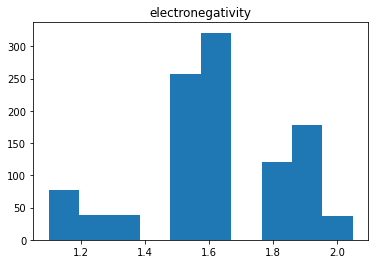

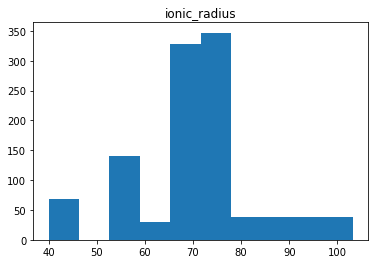

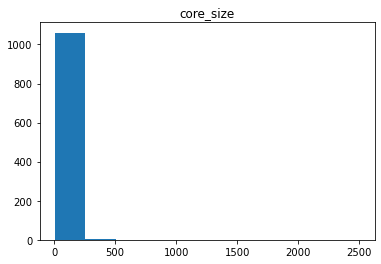

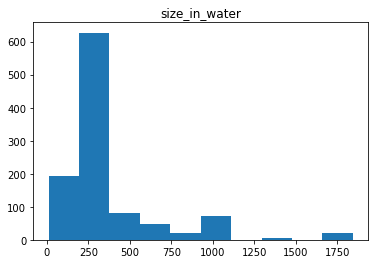

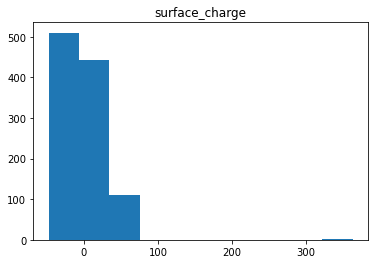

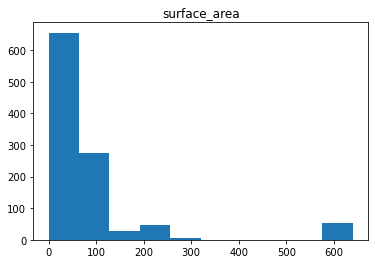

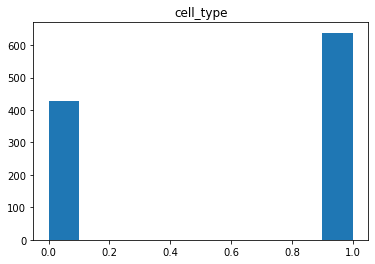

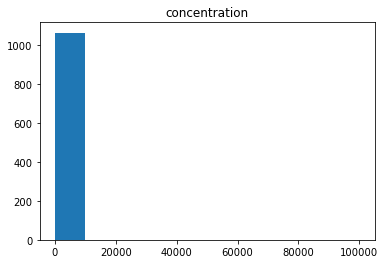

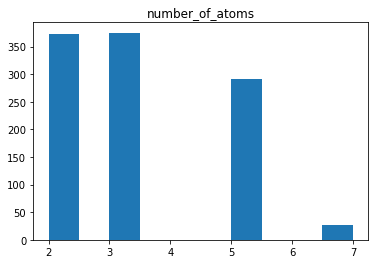

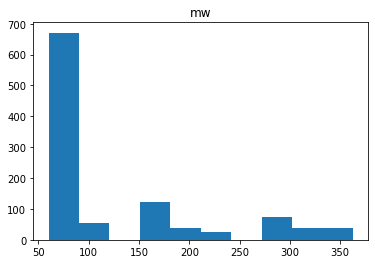

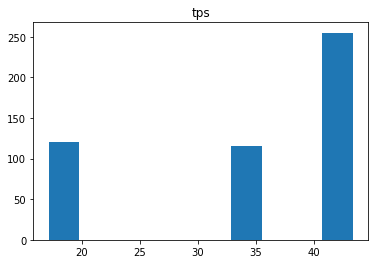

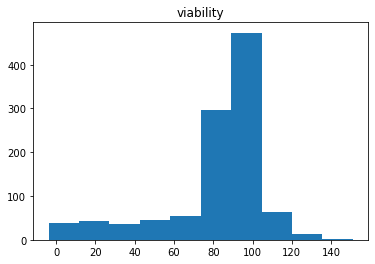

In [51]:
for i in col_num:
    print(i)
    plt.figure()
    plt.hist(db_4[i])
    plt.title(i)

E:\Jane\Programs\Anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

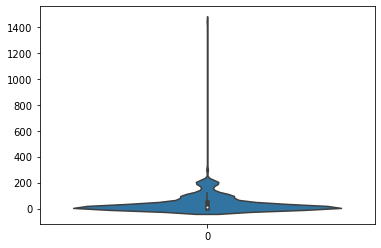

In [52]:
db_4.concentration = db_4['concentration'][db_4['concentration']<2000]
sns.violinplot(data=db_4.concentration)

<AxesSubplot:>

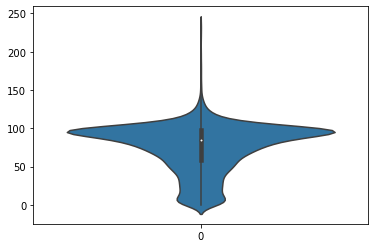

In [53]:
sns.violinplot(data=db_3.viability)

### Database_5

In [54]:
db_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   material        574 non-null    object 
 1   core_size       572 non-null    float64
 2   size_in_water   574 non-null    float64
 3   surface_charge  573 non-null    float64
 4   surface_area    574 non-null    float64
 5   cell_line       572 non-null    object 
 6   animal          574 non-null    object 
 7   source          574 non-null    object 
 8   cell_type       574 non-null    object 
 9   exposure_time   574 non-null    int64  
 10  concentration   574 non-null    float64
 11  viability       574 non-null    float64
 12  toxicity        574 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 58.4+ KB


In [55]:
col_cat = ['material', 'cell_type', 'animal', 'source', 'toxicity']
col_num = ['core_size', 'size_in_water', 'surface_charge', 'surface_area', 'concentration', 'viability']

In [56]:
for col in col_cat:
    print(col)
    print(db_5[col].unique())

material
['Al2O3' 'CuO' 'Fe2O3' 'Fe3O4' 'SiO2' 'TiO2' 'ZnO']
cell_type
['Normal' 'Cancer']
animal
['Human' 'Hamster' 'Mouse']
source
['Blood' 'Lung' 'Mesothelium' 'Bone' 'Breast' 'Liver' 'Colon' 'Nose']
toxicity
['nonToxic' 'Toxic']


In [57]:
#Создадим признак
db_5['type_inorganic'] = 1

db_5 = db_5.drop('toxicity', axis = 1)

core_size
size_in_water
surface_charge
surface_area
concentration
viability


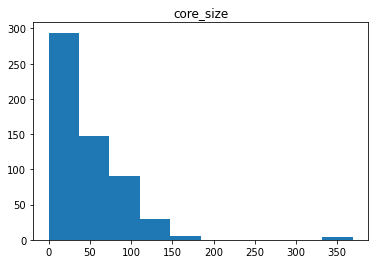

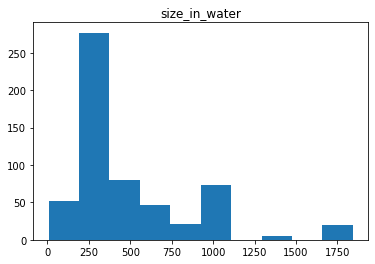

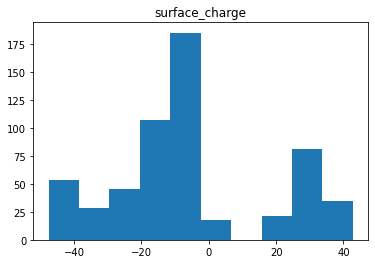

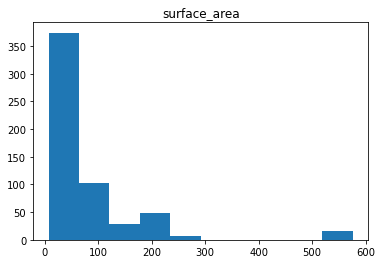

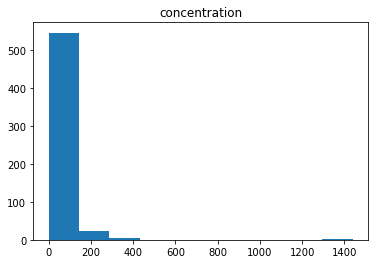

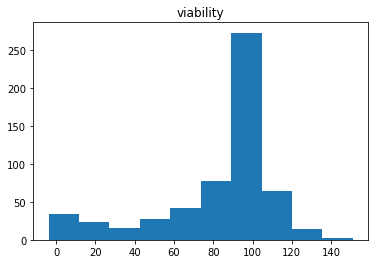

In [58]:
for i in col_num:
    print(i)
    plt.figure()
    plt.hist(db_5[i])
    plt.title(i)

## Объединение таблиц

In [59]:
dbs = [db_1, db_2, db_3, db_4, db_5]

db = pd.concat(dbs)

In [60]:
display(db)

,material,elements,electronegativity,ionic_radius,core_size,size_in_water,surface_charge,surface_area,cell_type,concentration,...,test,test_indicator,biochemical_metric,interference,colloidal_stability,positive_control,shape,synthesis_method,size_in_medium,number_of_cells
0,CuO,Cu,1.90,73.0,12.8,313.8,7.6,74.2,1,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ZnO,Zn,1.65,74.0,22.6,114.7,28.8,47.4,0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZnO,Zn,1.65,74.0,22.6,114.7,28.8,47.4,0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZnO,Zn,1.65,74.0,22.6,69.4,28.8,47.4,1,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mn2O3,Mn,1.55,58.0,51.5,291.7,-46.1,25.9,1,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,ZnO,NaN,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,ZnO,NaN,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,ZnO,NaN,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,ZnO,NaN,NaN,NaN,35.6,236.0,-41.6,27.9,Cancer,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Нужно найти ionic_radius, electronegaivity, elements

In [61]:
print(db.material.unique())
print(db_1.material.unique())
print(db_2.material.unique())
# надо заменить оксиды на формулы,

['CuO' 'ZnO' 'Mn2O3' 'CoO' 'CeO2' 'Fe2O3' 'Gd2O3' 'HfO2' 'In2O3' 'La2O3'
 'NiO' 'Sb2O3' 'SiO2' 'Al2O3' 'Se' 'CuS' 'Fe3O4' 'TiO2' 'Ti' 'Cr' 'Co'
 'Co3O4' 'CdO' 'MnO' 'Bi' 'Mo' 'Pt' 'Hydroxyapatite' 'Cu2O' 'MgO' 'QDs'
 'Au' 'Ag' 'EudragitRL' 'Dendrimer' 'PLGA' 'Polystyrene' 'Liposomes' 'SLN'
 'Carbon Nanotubes' 'Carbon NP' 'Chitosan' 'Alginate' 'PTFE-PMMA' 'Ce'
 'MWCNT' 'HAP' 'Ni' 'Carbon' 'ZrO2' 'C60' 'C70' 'SWCNT' 'Diamond'
 'Graphite' 'Cu' 'Ce O2' 'Bi2O3' nan]
['CuO' 'ZnO' 'Mn2O3' 'CoO' 'CeO2' 'Fe2O3' 'Gd2O3' 'HfO2' 'In2O3' 'La2O3'
 'NiO' 'Sb2O3' 'SiO2' 'Al2O3']
['CeO2' 'Se' 'CuO' 'CuS' 'ZnO' 'Fe3O4' 'TiO2' 'Ti' 'Cr' 'Co' 'Co3O4' 'CdO'
 'MnO' 'Bi' 'Mo' 'Pt' 'Hydroxyapatite' 'Cu2O' 'MgO' 'Al2O3' 'QDs' 'SiO2'
 'Au' 'Ag' 'EudragitRL' 'Dendrimer' 'PLGA' 'Polystyrene' 'Liposomes' 'SLN'
 'Carbon Nanotubes' 'Carbon NP' 'Chitosan']


In [62]:
df = db.copy()
display(df.sample(5))

,material,elements,electronegativity,ionic_radius,core_size,size_in_water,surface_charge,surface_area,cell_type,concentration,...,test,test_indicator,biochemical_metric,interference,colloidal_stability,positive_control,shape,synthesis_method,size_in_medium,number_of_cells
1038,TiO2,NaN,NaN,NaN,NaN,NaN,-27.80,NaN,AGS,0.000007,...,MTS,tetrazolium salt,cell metabolic activity,0.0,0.0,0.0,NaN,NaN,NaN,NaN
634,TiO2,Ti,1.54,68.0,25.0,504.5,-10.70,210.0,1,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,TiO2,Ti,1.54,68.0,10.0,1457.0,-11.00,166.0,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,Sb2O3,Sb,2.05,76.0,11.8,274.9,-35.30,93.6,0,200.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2957,Au,NaN,NaN,NaN,NaN,41.5,-24.52,NaN,CCL-110,4.000000,...,MTS,TetrazoliumSalt,NaN,NaN,NaN,NaN,Star,Chemical Reduction,206.7,5000.0


In [63]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9140 entries, 0 to 573
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   material             9138 non-null   object 
 1   elements             1561 non-null   object 
 2   electronegativity    1560 non-null   float64
 3   ionic_radius         1560 non-null   float64
 4   core_size            2131 non-null   float64
 5   size_in_water        4462 non-null   float64
 6   surface_charge       5879 non-null   float64
 7   surface_area         2133 non-null   float64
 8   cell_type            9140 non-null   object 
 9   concentration        8174 non-null   float64
 10  number_of_atoms      1559 non-null   float64
 11  mw                   1558 non-null   float64
 12  tps                  985 non-null    float64
 13  a                    946 non-null    float64
 14  b                    947 non-null    float64
 15  c                    946 non-null    fl

None

Удалим данные, составляющие менее 50%, для которых невозможно найти значения в базах:
biochemical_metric, interference, colloidal_stability, positive_control, size_in_medium, number_of_cells, а также данные кристаллической решетки

In [64]:
df = df.drop(['biochemical_metric', 'interference', 'colloidal_stability',
         'positive_control', 'size_in_medium', 'number_of_cells',
          'tps', 'a','b','c','alpha','beta','gama', 'density'], axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9140 entries, 0 to 573
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   material           9138 non-null   object 
 1   elements           1561 non-null   object 
 2   electronegativity  1560 non-null   float64
 3   ionic_radius       1560 non-null   float64
 4   core_size          2131 non-null   float64
 5   size_in_water      4462 non-null   float64
 6   surface_charge     5879 non-null   float64
 7   surface_area       2133 non-null   float64
 8   cell_type          9140 non-null   object 
 9   concentration      8174 non-null   float64
 10  number_of_atoms    1559 non-null   float64
 11  mw                 1558 non-null   float64
 12  viability          9133 non-null   float64
 13  type_inorganic     8646 non-null   float64
 14  coat               5162 non-null   object 
 15  diameter           6172 non-null   float64
 16  cell_line          7577 n

#Найдем металл из формулы оксида

df.material = df.material.replace({'Ay':'Au', 'Ce O2':'CeO2', 'QD':'QDs'})
def get_me(row):
    if (len(row['material'])>2 and len(row['material'])<6
        and row['type_inorganic']==1):
        el = row['material'][:2]
    elif len(row['material'])==2: row['elements'] = row['material']
            
    if row['material'] in ['Carbon Nanotubes', 'Carbon NP', 'Carbon', 'C60', 'C70', 'Diamond', 'Graphite']:
        el = 'C'
    return el    

df['element'] = df.apply(get_me)

## Анализ

<AxesSubplot:ylabel='material'>

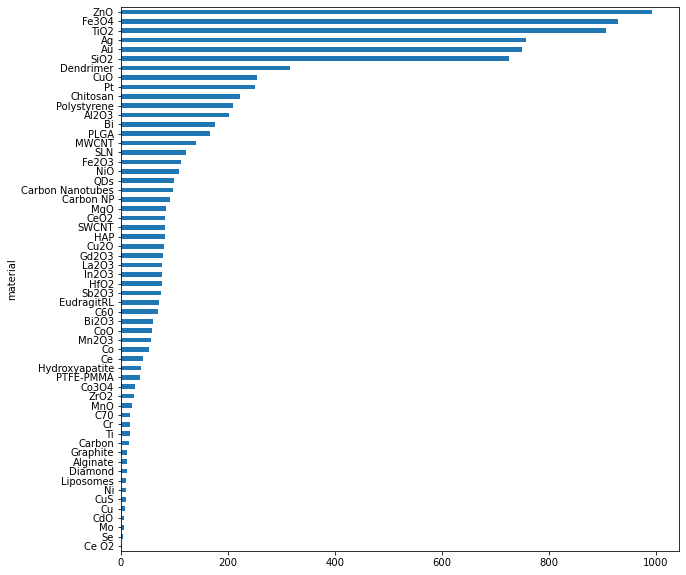

In [66]:
# Распределение данных по типу материала
df.groupby(by='material')['material'].count().sort_values().plot.barh(figsize=(10,10))

<AxesSubplot:>

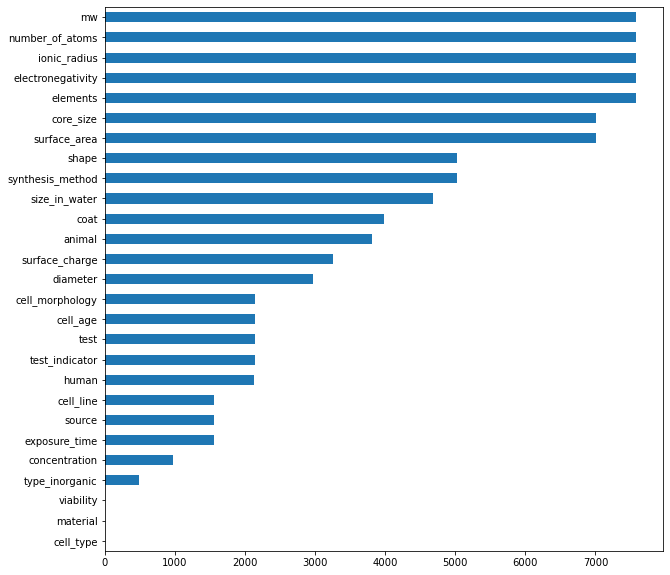

In [67]:
# Распределение пропусков по признакам
df.isna().sum().sort_values().plot.barh(figsize=(10,10))

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9140 entries, 0 to 573
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   material           9138 non-null   object 
 1   elements           1561 non-null   object 
 2   electronegativity  1560 non-null   float64
 3   ionic_radius       1560 non-null   float64
 4   core_size          2131 non-null   float64
 5   size_in_water      4462 non-null   float64
 6   surface_charge     5879 non-null   float64
 7   surface_area       2133 non-null   float64
 8   cell_type          9140 non-null   object 
 9   concentration      8174 non-null   float64
 10  number_of_atoms    1559 non-null   float64
 11  mw                 1558 non-null   float64
 12  viability          9133 non-null   float64
 13  type_inorganic     8646 non-null   float64
 14  coat               5162 non-null   object 
 15  diameter           6172 non-null   float64
 16  cell_line          7577 n

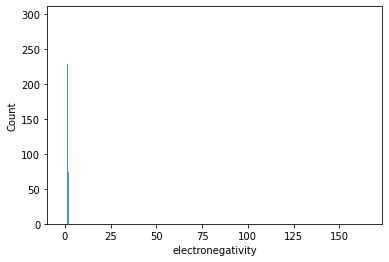

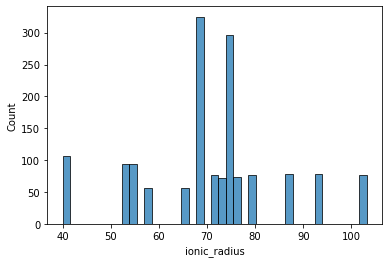

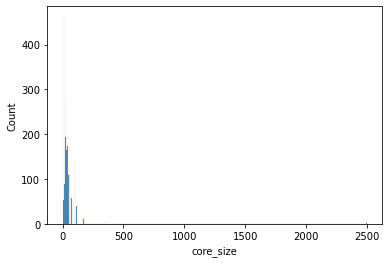

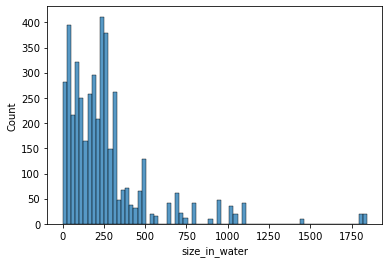

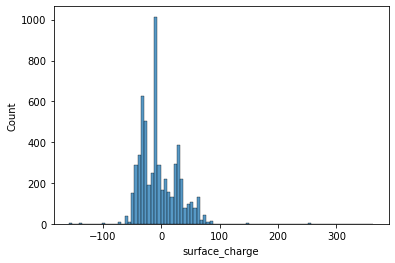

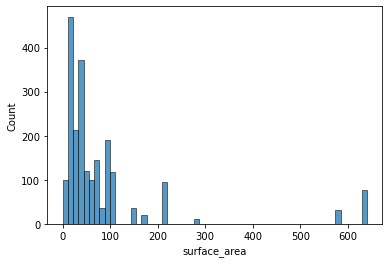

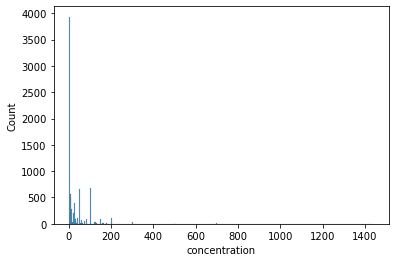

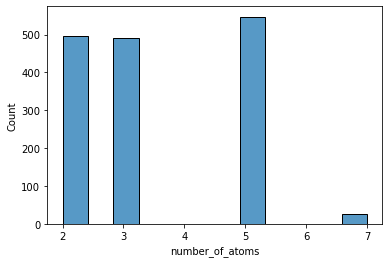

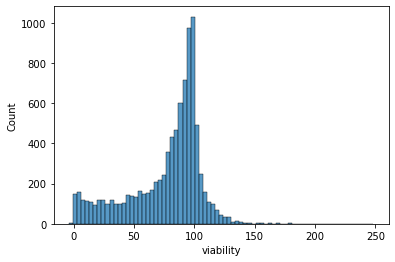

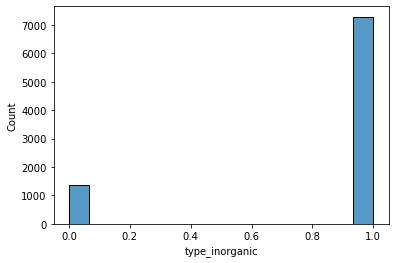

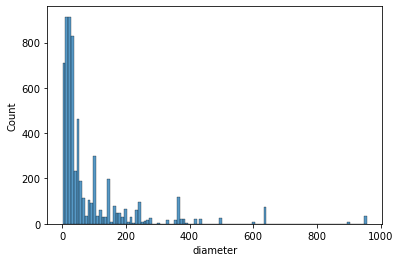

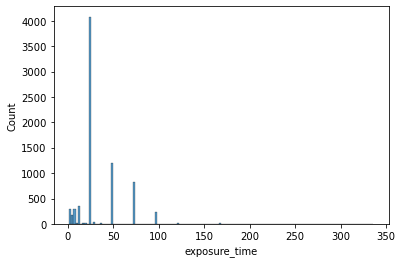

In [69]:
# распределение числовых признаков
col_num = ['electronegativity', 'ionic_radius', 'core_size', 
          'size_in_water', 'surface_charge', 'surface_area', 'concentration', 
          'number_of_atoms', 'viability', 'type_inorganic', 'diameter', 'exposure_time'] 
for col in col_num:
    plt.figure()
    sns.histplot(data=df[col])

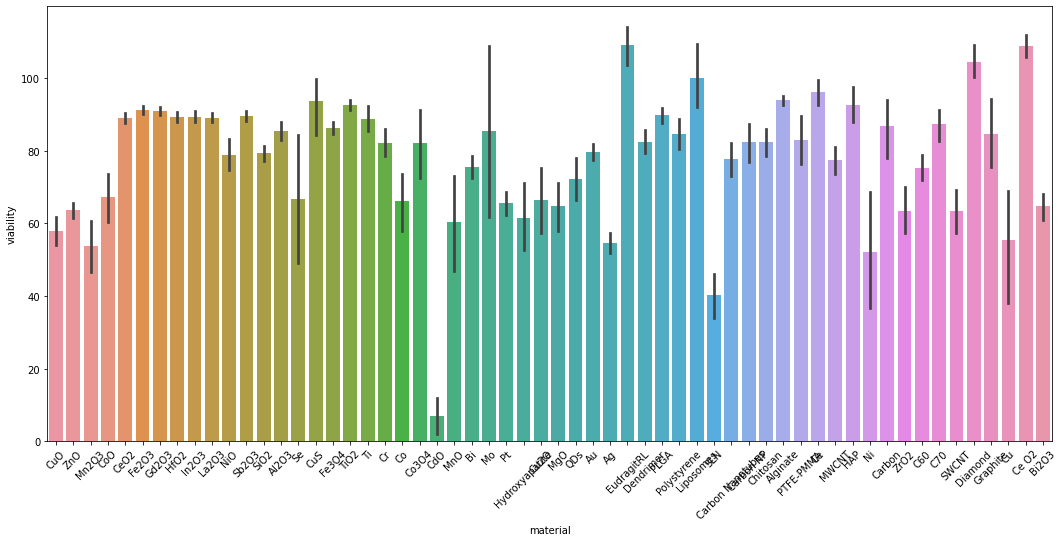

In [70]:
# Viability от типа материала
plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
p = sns.barplot(data = df, x='material', y='viability')
#sns.scatterplot(data=df, x='material', y='viability')

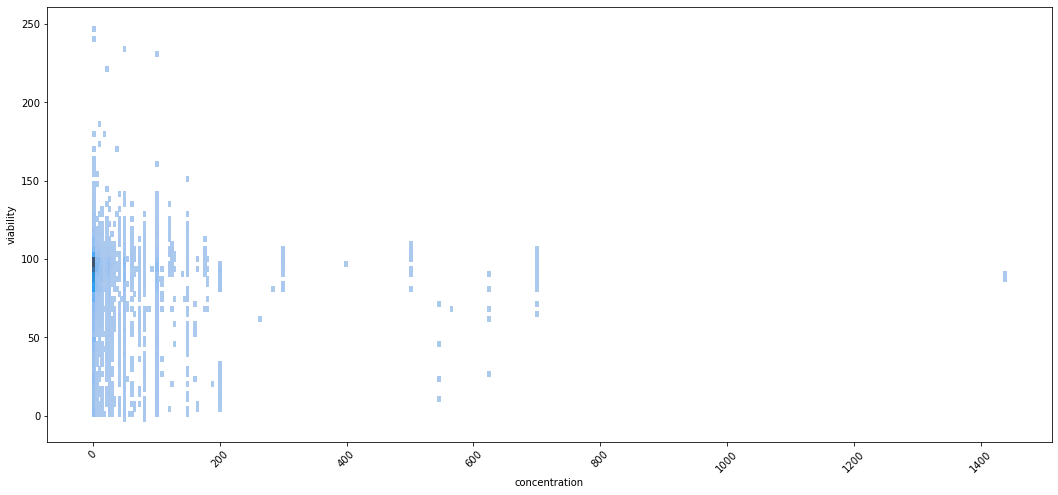

In [71]:
# Viability от концентрации
plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
p = sns.histplot(data = df, x='concentration', y='viability')
#sns.scatterplot(data=df, x='material', y='viability')

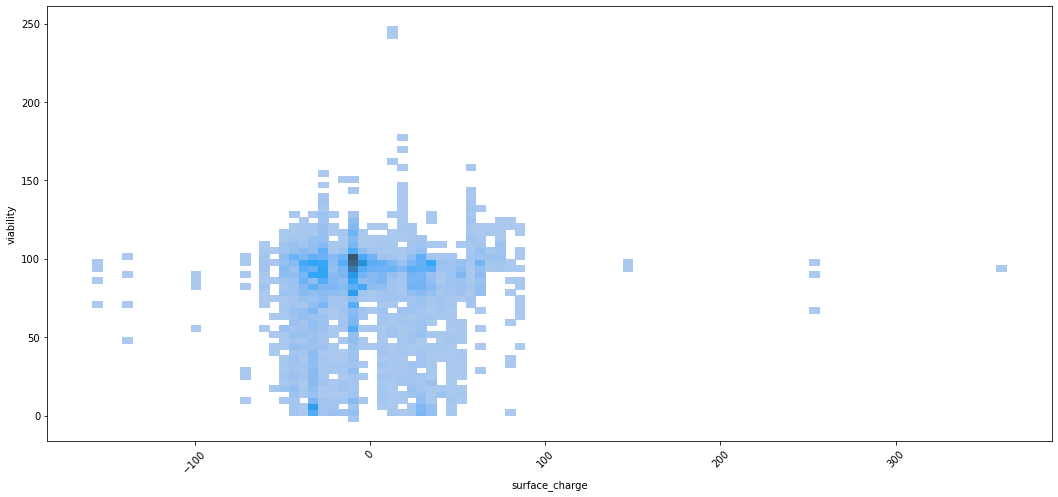

In [72]:
# Viability от surface charge
plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
p = sns.histplot(data = df, x='surface_charge', y='viability')
#sns.scatterplot(data=df, x='material', y='viability')

## Заполнение пропусков

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9140 entries, 0 to 573
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   material           9138 non-null   object 
 1   elements           1561 non-null   object 
 2   electronegativity  1560 non-null   float64
 3   ionic_radius       1560 non-null   float64
 4   core_size          2131 non-null   float64
 5   size_in_water      4462 non-null   float64
 6   surface_charge     5879 non-null   float64
 7   surface_area       2133 non-null   float64
 8   cell_type          9140 non-null   object 
 9   concentration      8174 non-null   float64
 10  number_of_atoms    1559 non-null   float64
 11  mw                 1558 non-null   float64
 12  viability          9133 non-null   float64
 13  type_inorganic     8646 non-null   float64
 14  coat               5162 non-null   object 
 15  diameter           6172 non-null   float64
 16  cell_line          7577 n

In [74]:
df = df.dropna(subset=['material'])
df['element'] = df['material'].replace({'CuO': 'Cu', 
                                       'ZnO': 'Zn', 
                                       'Mn2O3':'Mn', 
                                        'CoO':'Co',
                                       'CeO2': 'Ce',
                                       'Fe2O3': 'Fe',
                                        'Gd2O3': 'Gd',
                                        'HfO2':'Hf',
                                        'In2O3':'In',
                                        'La2O3':'La',
                                        'NiO':'Ni',
                                        'Sb2O3':'Sb',
                                        'SiO2':'Si',
                                        'Al2O3':'Al',
                                        'Se':'Se',
                                        'CuS':'Cu',
                                       'Fe3O4':'Fe',
                                        'TiO2':'Ti',
                                        'Ti':'Ti',
                                        'Cr':'Cr',
                                        'Co':'Co', 
                                        'Co3O4':'Co',
                                        'CdO':'Cd',
                                        'MnO':'Mn',
                                        'Bi':'Bi',
                                       'Mo':'Mo', 
                                        'Pt':'Pt',
                                        'Hydroxyapatite':'Ca',
                                        'Cu2O':'Cu', 
                                        'MgO':'Mg',
                                        'QD':'QDs', 
                                        'Au':'Au', 
                                        'Ag':'Ag',
                                       'EudragitRL':'Eudragit',
                                        'Dendrimer':'Dendrimer', 
                                        'PLGA': 'PLGA',
                                        'Polystyrene': 'Polystyrene',
                                        'Liposomes': 'Liposomes',
                                       'SLN': 'SLN', 
                                        'Carbon Nanotubes':'C',
                                        'Carbon NP':'C', 
                                        'Chitosan':'Chitosan', 
                                       'Alginate':'Alginate',
                                        'PTFE-PMMA':'PTFE-PMMA', 
                                        'MWCNT':'MWCNT',
                                        'HAP':'HAP', 
                                        'Ni':'Ni',
                                       'Carbon':'C', 
                                        'ZrO2':'Zr', 
                                        'C60':'C',
                                        'C70':'C',
                                        'SWCNT':'SWCNT',
                                        'Diamond':'C', 'Graphite':'C',
       'Au':'Au', 'Cu':'Cu', 'CeO2':'Ce', 'Bi2O3':'Bi'})

In [75]:
df.columns

Index(['material', 'elements', 'electronegativity', 'ionic_radius',
       'core_size', 'size_in_water', 'surface_charge', 'surface_area',
       'cell_type', 'concentration', 'number_of_atoms', 'mw', 'viability',
       'type_inorganic', 'coat', 'diameter', 'cell_line', 'human', 'animal',
       'cell_morphology', 'cell_age', 'source', 'exposure_time', 'test',
       'test_indicator', 'shape', 'synthesis_method', 'element'],
      dtype='object')

In [76]:
#Удалим малозаполненные поля (ограниченные временные и человеческие ресурсы)
df_new = df[['material', 'size_in_water', 'surface_charge',
       'cell_type', 'concentration', 'viability',
       'type_inorganic', 'coat', 'diameter', 'cell_line', 'human', 'animal',
       'cell_morphology', 'cell_age', 'source', 'exposure_time', 'test',
       'test_indicator', 'shape', 'synthesis_method', 'element']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9138 entries, 0 to 573
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   material          9138 non-null   object 
 1   size_in_water     4460 non-null   float64
 2   surface_charge    5878 non-null   float64
 3   cell_type         9138 non-null   object 
 4   concentration     8172 non-null   float64
 5   viability         9131 non-null   float64
 6   type_inorganic    8644 non-null   float64
 7   coat              5162 non-null   object 
 8   diameter          6172 non-null   float64
 9   cell_line         7577 non-null   object 
 10  human             7005 non-null   float64
 11  animal            5335 non-null   object 
 12  cell_morphology   7004 non-null   object 
 13  cell_age          7004 non-null   object 
 14  source            7579 non-null   object 
 15  exposure_time     7579 non-null   float64
 16  test              7004 non-null   object 
 

## Заполнение пропусков

In [77]:

cat_col = ['material', 'cell_type', 'coat', 'cell_line', 'human', 'animal',
           'cell_morphology', 'cell_age', 'source', 'test',
           'test_indicator', 'shape', 'synthesis_method', 'element']
num_col = ['size_in_water', 'surface_charge',
       'concentration', 'viability',
       'diameter', 'exposure_time']
for col in cat_col:
    df_new[col] = df_new[col].fillna('unknown')
    
for col in num_col:
    df_new[col] = df_new[col].fillna(df_new[col].median())    

df_new['type_inorganic'] = df_new['type_inorganic'].fillna(0) 

<ipython-input-77-ed6ab8f238cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = df_new[col].fillna('unknown')
<ipython-input-77-ed6ab8f238cc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = df_new[col].fillna(df_new[col].median())
<ipython-input-77-ed6ab8f238cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

## Корреляция признаков

6

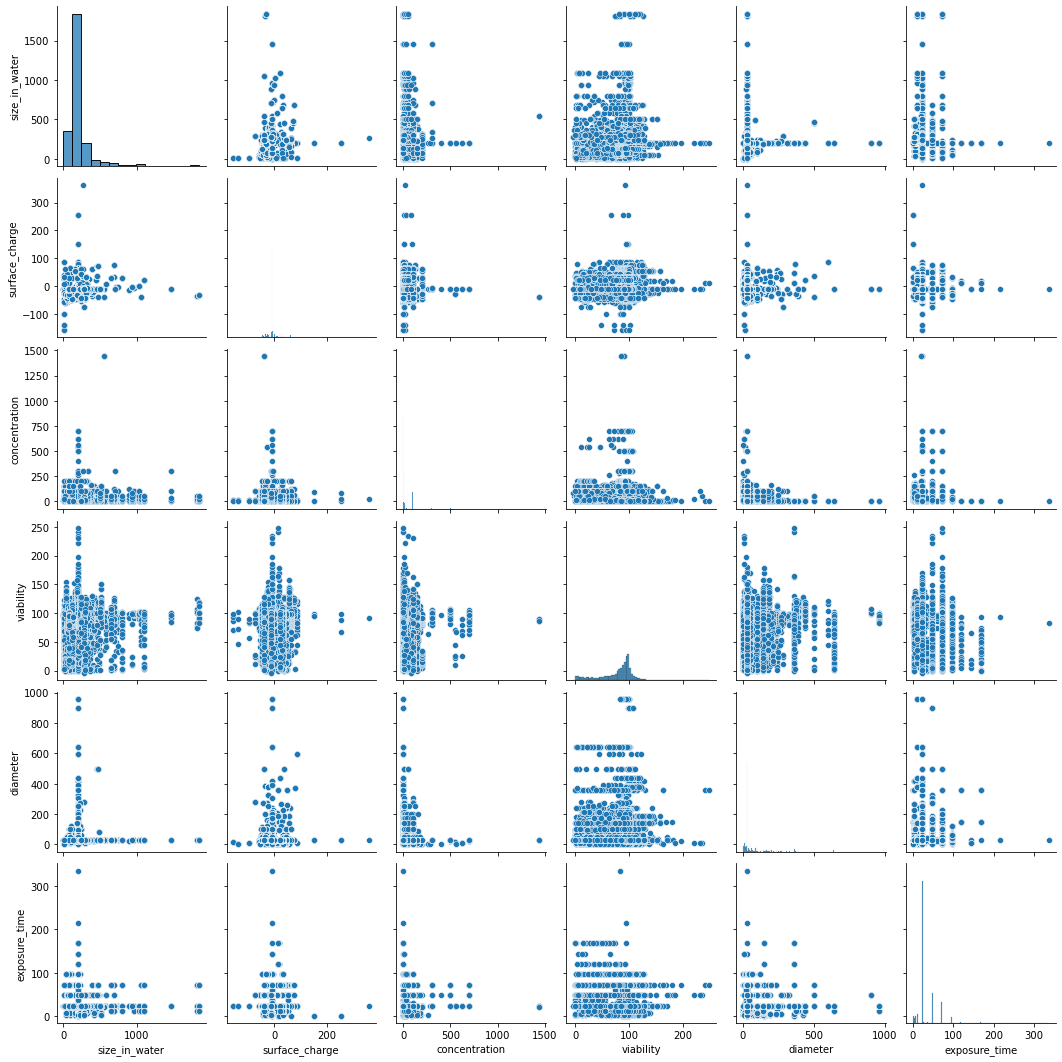

In [78]:
# Матрица графиков зависимости графиков друг от друга
sns.pairplot(df_new[num_col])
len(num_col)

# стандартизация и нормализация

x = df[[num_col]].values

# cols
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=cols_to_analyse)
df

for i in cols:
    print(i)
    plt.figure()
    plt.hist(df[i])
    plt.title(i)

## Разделение данных на выборки

In [79]:

features = df_new.drop('viability', axis = 1)
target = df_new['viability']
features_train, features_test, target_train, target_test = train_test_split(
                        features, target, test_size = 0.25, random_state = 42)

## Модели

### CatBoost

[['material', 'size_in_water', 'surface_charge',
       'cell_type', 'concentration', 'viability',
       'type_inorganic', 'coat', 'diameter', 'cell_line', 'human', 'animal',
       'cell_morphology', 'cell_age', 'source', 'exposure_time', 'test',
       'test_indicator', 'shape', 'synthesis_method', 'element']]

In [80]:
df_catboost = df_new[['material', 'size_in_water', 'exposure_time', 'surface_charge', 'concentration',
                      'cell_type',  'diameter','cell_line','cell_morphology', 'cell_age', 'source', 
     'element', 'type_inorganic', 'viability']]

cat_features = ['material', 'element', 'cell_type', 'cell_line','cell_morphology', 'cell_age', 'source']

features = df_catboost.drop('viability', axis = 1)
target = df_catboost['viability']

features_train, features_test, target_train, target_test = train_test_split(
                        features, target, test_size = 0.25, random_state = 42)

In [81]:
%%time
estimator = CatBoostRegressor(random_seed = 42)
parameters = {
    'n_estimators': (200, 800, 100), 
    'learning_rate': [0.1, 0.5, 0.1],
    'max_depth': [3, 6]
}


model_cb = GridSearchCV(estimator = estimator, 
                       param_grid = parameters,
                       cv = 2, verbose=10)

# Обучение
model_cb.fit(features_train, target_train, cat_features=cat_features, verbose=2)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START learning_rate=0.1, max_depth=3, n_estimators=200...........
0:	learn: 30.1438519	total: 153ms	remaining: 30.4s
2:	learn: 29.4272457	total: 179ms	remaining: 11.8s
4:	learn: 28.9435348	total: 204ms	remaining: 7.94s
6:	learn: 28.3622140	total: 225ms	remaining: 6.19s
8:	learn: 27.9505931	total: 246ms	remaining: 5.22s
10:	learn: 27.6428094	total: 268ms	remaining: 4.6s
12:	learn: 27.4026760	total: 288ms	remaining: 4.15s
14:	learn: 27.2017140	total: 311ms	remaining: 3.83s
16:	learn: 26.9567941	total: 332ms	remaining: 3.57s
18:	learn: 26.8043080	total: 353ms	remaining: 3.36s
20:	learn: 26.6644800	total: 376ms	remaining: 3.2s
22:	learn: 26.5344850	total: 400ms	remaining: 3.08s
24:	learn: 26.3714343	total: 424ms	remaining: 2.97s
26:	learn: 26.2695731	total: 447ms	remaining: 2.87s
28:	learn: 26.1977805	total: 470ms	remaining: 2.77s
30:	learn: 26.1230352	total: 493ms	remaining: 2.69s
32:	learn: 26.0723264	total: 515m

118:	learn: 23.6494970	total: 1.33s	remaining: 905ms
120:	learn: 23.6201694	total: 1.35s	remaining: 882ms
122:	learn: 23.5610246	total: 1.37s	remaining: 860ms
124:	learn: 23.5217817	total: 1.4s	remaining: 839ms
126:	learn: 23.4869706	total: 1.42s	remaining: 816ms
128:	learn: 23.4426709	total: 1.44s	remaining: 793ms
130:	learn: 23.3998534	total: 1.46s	remaining: 770ms
132:	learn: 23.3837515	total: 1.48s	remaining: 747ms
134:	learn: 23.3181996	total: 1.5s	remaining: 725ms
136:	learn: 23.2924694	total: 1.53s	remaining: 703ms
138:	learn: 23.2667617	total: 1.55s	remaining: 681ms
140:	learn: 23.2408593	total: 1.57s	remaining: 658ms
142:	learn: 23.1824263	total: 1.59s	remaining: 635ms
144:	learn: 23.1692277	total: 1.61s	remaining: 612ms
146:	learn: 23.1320666	total: 1.64s	remaining: 590ms
148:	learn: 23.1139555	total: 1.66s	remaining: 567ms
150:	learn: 23.0801548	total: 1.68s	remaining: 545ms
152:	learn: 23.0565458	total: 1.7s	remaining: 522ms
154:	learn: 23.0361382	total: 1.72s	remaining: 50

232:	learn: 22.7481265	total: 2.58s	remaining: 6.27s
234:	learn: 22.7222759	total: 2.6s	remaining: 6.25s
236:	learn: 22.6796655	total: 2.62s	remaining: 6.22s
238:	learn: 22.6455935	total: 2.64s	remaining: 6.2s
240:	learn: 22.6401058	total: 2.66s	remaining: 6.18s
242:	learn: 22.6332822	total: 2.69s	remaining: 6.16s
244:	learn: 22.6314297	total: 2.71s	remaining: 6.13s
246:	learn: 22.6134855	total: 2.73s	remaining: 6.11s
248:	learn: 22.6002594	total: 2.75s	remaining: 6.08s
250:	learn: 22.5890786	total: 2.77s	remaining: 6.06s
252:	learn: 22.5872044	total: 2.79s	remaining: 6.04s
254:	learn: 22.5600953	total: 2.81s	remaining: 6.02s
256:	learn: 22.5491471	total: 2.84s	remaining: 6s
258:	learn: 22.5260235	total: 2.86s	remaining: 5.97s
260:	learn: 22.5007250	total: 2.88s	remaining: 5.95s
262:	learn: 22.4855625	total: 2.9s	remaining: 5.93s
264:	learn: 22.4645209	total: 2.92s	remaining: 5.9s
266:	learn: 22.4439497	total: 2.94s	remaining: 5.88s
268:	learn: 22.4249414	total: 2.97s	remaining: 5.86s


550:	learn: 20.5904929	total: 6.2s	remaining: 2.8s
552:	learn: 20.5889919	total: 6.22s	remaining: 2.78s
554:	learn: 20.5828029	total: 6.24s	remaining: 2.75s
556:	learn: 20.5802537	total: 6.26s	remaining: 2.73s
558:	learn: 20.5750194	total: 6.28s	remaining: 2.71s
560:	learn: 20.5724323	total: 6.3s	remaining: 2.69s
562:	learn: 20.5656654	total: 6.33s	remaining: 2.66s
564:	learn: 20.5606128	total: 6.35s	remaining: 2.64s
566:	learn: 20.5510898	total: 6.37s	remaining: 2.62s
568:	learn: 20.5439663	total: 6.39s	remaining: 2.59s
570:	learn: 20.5336194	total: 6.41s	remaining: 2.57s
572:	learn: 20.5317750	total: 6.44s	remaining: 2.55s
574:	learn: 20.5213847	total: 6.46s	remaining: 2.53s
576:	learn: 20.5128729	total: 6.48s	remaining: 2.5s
578:	learn: 20.5089243	total: 6.5s	remaining: 2.48s
580:	learn: 20.4997470	total: 6.52s	remaining: 2.46s
582:	learn: 20.4972931	total: 6.54s	remaining: 2.43s
584:	learn: 20.4935172	total: 6.56s	remaining: 2.41s
586:	learn: 20.4899804	total: 6.58s	remaining: 2.39

68:	learn: 24.7824524	total: 750ms	remaining: 7.94s
70:	learn: 24.7370816	total: 771ms	remaining: 7.92s
72:	learn: 24.7098418	total: 796ms	remaining: 7.92s
74:	learn: 24.6935157	total: 818ms	remaining: 7.91s
76:	learn: 24.6312714	total: 839ms	remaining: 7.88s
78:	learn: 24.5764626	total: 860ms	remaining: 7.85s
80:	learn: 24.5486849	total: 881ms	remaining: 7.82s
82:	learn: 24.4952532	total: 904ms	remaining: 7.8s
84:	learn: 24.4578192	total: 941ms	remaining: 7.91s
86:	learn: 24.4189825	total: 965ms	remaining: 7.91s
88:	learn: 24.3651529	total: 987ms	remaining: 7.88s
90:	learn: 24.3031927	total: 1.01s	remaining: 7.86s
92:	learn: 24.2852070	total: 1.03s	remaining: 7.83s
94:	learn: 24.2531477	total: 1.05s	remaining: 7.8s
96:	learn: 24.1973888	total: 1.07s	remaining: 7.77s
98:	learn: 24.1282763	total: 1.1s	remaining: 7.76s
100:	learn: 24.0639350	total: 1.12s	remaining: 7.73s
102:	learn: 24.0183742	total: 1.14s	remaining: 7.7s
104:	learn: 23.9673657	total: 1.16s	remaining: 7.68s
106:	learn: 2

390:	learn: 21.2886383	total: 4.4s	remaining: 4.61s
392:	learn: 21.2781334	total: 4.42s	remaining: 4.58s
394:	learn: 21.2446327	total: 4.45s	remaining: 4.56s
396:	learn: 21.2382015	total: 4.47s	remaining: 4.54s
398:	learn: 21.2308021	total: 4.49s	remaining: 4.51s
400:	learn: 21.2164299	total: 4.51s	remaining: 4.49s
402:	learn: 21.2064491	total: 4.53s	remaining: 4.46s
404:	learn: 21.2004464	total: 4.55s	remaining: 4.44s
406:	learn: 21.1885401	total: 4.57s	remaining: 4.42s
408:	learn: 21.1760391	total: 4.6s	remaining: 4.39s
410:	learn: 21.1714574	total: 4.62s	remaining: 4.37s
412:	learn: 21.1664102	total: 4.64s	remaining: 4.35s
414:	learn: 21.1314667	total: 4.67s	remaining: 4.33s
416:	learn: 21.1150805	total: 4.71s	remaining: 4.32s
418:	learn: 21.1072701	total: 4.73s	remaining: 4.3s
420:	learn: 21.0975591	total: 4.75s	remaining: 4.28s
422:	learn: 21.0885231	total: 4.77s	remaining: 4.25s
424:	learn: 21.0588112	total: 4.79s	remaining: 4.23s
426:	learn: 21.0471257	total: 4.81s	remaining: 4.

718:	learn: 19.8680445	total: 8.04s	remaining: 905ms
720:	learn: 19.8626912	total: 8.06s	remaining: 883ms
722:	learn: 19.8527371	total: 8.08s	remaining: 861ms
724:	learn: 19.8483670	total: 8.1s	remaining: 838ms
726:	learn: 19.8356438	total: 8.13s	remaining: 816ms
728:	learn: 19.8281219	total: 8.15s	remaining: 794ms
730:	learn: 19.8256646	total: 8.17s	remaining: 771ms
732:	learn: 19.8160934	total: 8.2s	remaining: 750ms
734:	learn: 19.8147405	total: 8.23s	remaining: 728ms
736:	learn: 19.8112043	total: 8.26s	remaining: 706ms
738:	learn: 19.8060697	total: 8.28s	remaining: 683ms
740:	learn: 19.8011096	total: 8.3s	remaining: 661ms
742:	learn: 19.7950258	total: 8.32s	remaining: 639ms
744:	learn: 19.7797376	total: 8.35s	remaining: 616ms
746:	learn: 19.7711015	total: 8.37s	remaining: 594ms
748:	learn: 19.7643980	total: 8.39s	remaining: 571ms
750:	learn: 19.7510737	total: 8.41s	remaining: 549ms
752:	learn: 19.7463399	total: 8.45s	remaining: 528ms
754:	learn: 19.7405190	total: 8.48s	remaining: 50

8:	learn: 27.1928649	total: 190ms	remaining: 4.03s
10:	learn: 26.6904530	total: 236ms	remaining: 4.05s
12:	learn: 26.3241266	total: 281ms	remaining: 4.04s
14:	learn: 26.0419290	total: 326ms	remaining: 4.03s
16:	learn: 25.7756030	total: 372ms	remaining: 4s
18:	learn: 25.5783642	total: 422ms	remaining: 4.02s
20:	learn: 25.2663110	total: 468ms	remaining: 3.99s
22:	learn: 25.0523346	total: 517ms	remaining: 3.98s
24:	learn: 24.9087572	total: 564ms	remaining: 3.95s
26:	learn: 24.6859726	total: 610ms	remaining: 3.91s
28:	learn: 24.5981593	total: 649ms	remaining: 3.82s
30:	learn: 24.4552132	total: 710ms	remaining: 3.87s
32:	learn: 24.3007078	total: 741ms	remaining: 3.75s
34:	learn: 24.1634475	total: 787ms	remaining: 3.71s
36:	learn: 24.0735695	total: 833ms	remaining: 3.67s
38:	learn: 23.9505269	total: 881ms	remaining: 3.64s
40:	learn: 23.8873976	total: 926ms	remaining: 3.59s
42:	learn: 23.8148522	total: 962ms	remaining: 3.51s
44:	learn: 23.7616919	total: 999ms	remaining: 3.44s
46:	learn: 23.65

120:	learn: 21.0032665	total: 2.83s	remaining: 1.85s
122:	learn: 20.9527339	total: 2.88s	remaining: 1.8s
124:	learn: 20.8884867	total: 2.93s	remaining: 1.76s
126:	learn: 20.8295797	total: 2.98s	remaining: 1.71s
128:	learn: 20.7934078	total: 3.02s	remaining: 1.66s
130:	learn: 20.7839788	total: 3.07s	remaining: 1.62s
132:	learn: 20.7561288	total: 3.12s	remaining: 1.57s
134:	learn: 20.6745104	total: 3.16s	remaining: 1.52s
136:	learn: 20.6076556	total: 3.21s	remaining: 1.48s
138:	learn: 20.5779261	total: 3.26s	remaining: 1.43s
140:	learn: 20.4930443	total: 3.31s	remaining: 1.38s
142:	learn: 20.4476280	total: 3.35s	remaining: 1.34s
144:	learn: 20.3900498	total: 3.4s	remaining: 1.29s
146:	learn: 20.3596700	total: 3.45s	remaining: 1.24s
148:	learn: 20.2900264	total: 3.5s	remaining: 1.2s
150:	learn: 20.2499335	total: 3.54s	remaining: 1.15s
152:	learn: 20.2292984	total: 3.61s	remaining: 1.11s
154:	learn: 20.1518338	total: 3.65s	remaining: 1.06s
156:	learn: 20.1332090	total: 3.7s	remaining: 1.01

232:	learn: 18.7564576	total: 5.7s	remaining: 13.9s
234:	learn: 18.7212433	total: 5.75s	remaining: 13.8s
236:	learn: 18.6947087	total: 5.79s	remaining: 13.8s
238:	learn: 18.6744185	total: 5.84s	remaining: 13.7s
240:	learn: 18.6465166	total: 5.89s	remaining: 13.7s
242:	learn: 18.6038115	total: 5.94s	remaining: 13.6s
244:	learn: 18.5514050	total: 5.99s	remaining: 13.6s
246:	learn: 18.5267012	total: 6.04s	remaining: 13.5s
248:	learn: 18.5039932	total: 6.09s	remaining: 13.5s
250:	learn: 18.4872808	total: 6.14s	remaining: 13.4s
252:	learn: 18.4662391	total: 6.19s	remaining: 13.4s
254:	learn: 18.4447913	total: 6.24s	remaining: 13.3s
256:	learn: 18.4324325	total: 6.28s	remaining: 13.3s
258:	learn: 18.3938376	total: 6.35s	remaining: 13.3s
260:	learn: 18.3673633	total: 6.4s	remaining: 13.2s
262:	learn: 18.3477744	total: 6.44s	remaining: 13.2s
264:	learn: 18.3364924	total: 6.49s	remaining: 13.1s
266:	learn: 18.3043468	total: 6.54s	remaining: 13s
268:	learn: 18.2505622	total: 6.59s	remaining: 13s

544:	learn: 15.7142776	total: 13.3s	remaining: 6.22s
546:	learn: 15.7003252	total: 13.3s	remaining: 6.17s
548:	learn: 15.6892302	total: 13.4s	remaining: 6.12s
550:	learn: 15.6608394	total: 13.4s	remaining: 6.07s
552:	learn: 15.6401795	total: 13.5s	remaining: 6.02s
554:	learn: 15.6287274	total: 13.5s	remaining: 5.97s
556:	learn: 15.6164863	total: 13.6s	remaining: 5.92s
558:	learn: 15.6112575	total: 13.6s	remaining: 5.88s
560:	learn: 15.6064584	total: 13.7s	remaining: 5.83s
562:	learn: 15.5928306	total: 13.7s	remaining: 5.78s
564:	learn: 15.5922517	total: 13.8s	remaining: 5.74s
566:	learn: 15.5796570	total: 13.9s	remaining: 5.69s
568:	learn: 15.5699961	total: 13.9s	remaining: 5.65s
570:	learn: 15.5540068	total: 14s	remaining: 5.6s
572:	learn: 15.5470155	total: 14s	remaining: 5.55s
574:	learn: 15.5292471	total: 14.1s	remaining: 5.5s
576:	learn: 15.5222555	total: 14.1s	remaining: 5.46s
578:	learn: 15.5137990	total: 14.2s	remaining: 5.41s
580:	learn: 15.4961112	total: 14.2s	remaining: 5.36s

50:	learn: 23.2076883	total: 1.2s	remaining: 17.7s
52:	learn: 23.1543572	total: 1.25s	remaining: 17.6s
54:	learn: 22.9950227	total: 1.3s	remaining: 17.6s
56:	learn: 22.9261221	total: 1.34s	remaining: 17.5s
58:	learn: 22.8166137	total: 1.39s	remaining: 17.5s
60:	learn: 22.7826838	total: 1.44s	remaining: 17.4s
62:	learn: 22.7118397	total: 1.49s	remaining: 17.4s
64:	learn: 22.6547246	total: 1.53s	remaining: 17.3s
66:	learn: 22.5892289	total: 1.58s	remaining: 17.3s
68:	learn: 22.5527763	total: 1.62s	remaining: 17.2s
70:	learn: 22.5182505	total: 1.68s	remaining: 17.2s
72:	learn: 22.4564460	total: 1.72s	remaining: 17.2s
74:	learn: 22.3693482	total: 1.77s	remaining: 17.1s
76:	learn: 22.3182577	total: 1.82s	remaining: 17.1s
78:	learn: 22.2323913	total: 1.86s	remaining: 17s
80:	learn: 22.1787949	total: 1.91s	remaining: 17s
82:	learn: 22.1715746	total: 1.94s	remaining: 16.8s
84:	learn: 22.0978501	total: 1.99s	remaining: 16.8s
86:	learn: 22.0599516	total: 2.04s	remaining: 16.7s
88:	learn: 21.9881

368:	learn: 16.9613127	total: 8.8s	remaining: 10.3s
370:	learn: 16.9176212	total: 8.85s	remaining: 10.2s
372:	learn: 16.8910992	total: 8.89s	remaining: 10.2s
374:	learn: 16.8660677	total: 8.94s	remaining: 10.1s
376:	learn: 16.8550986	total: 8.99s	remaining: 10.1s
378:	learn: 16.8312093	total: 9.04s	remaining: 10s
380:	learn: 16.7953472	total: 9.09s	remaining: 9.99s
382:	learn: 16.7665282	total: 9.13s	remaining: 9.94s
384:	learn: 16.7360089	total: 9.18s	remaining: 9.89s
386:	learn: 16.7133201	total: 9.23s	remaining: 9.85s
388:	learn: 16.6977338	total: 9.28s	remaining: 9.8s
390:	learn: 16.6880456	total: 9.32s	remaining: 9.75s
392:	learn: 16.6275939	total: 9.37s	remaining: 9.7s
394:	learn: 16.6040978	total: 9.41s	remaining: 9.65s
396:	learn: 16.5875828	total: 9.46s	remaining: 9.6s
398:	learn: 16.5771994	total: 9.5s	remaining: 9.55s
400:	learn: 16.5498962	total: 9.55s	remaining: 9.5s
402:	learn: 16.5468695	total: 9.6s	remaining: 9.46s
404:	learn: 16.5261257	total: 9.64s	remaining: 9.41s
40

684:	learn: 14.3892565	total: 16.5s	remaining: 2.77s
686:	learn: 14.3790277	total: 16.5s	remaining: 2.72s
688:	learn: 14.3610721	total: 16.6s	remaining: 2.67s
690:	learn: 14.3410764	total: 16.6s	remaining: 2.62s
692:	learn: 14.3357322	total: 16.7s	remaining: 2.57s
694:	learn: 14.3190510	total: 16.7s	remaining: 2.52s
696:	learn: 14.3063168	total: 16.8s	remaining: 2.48s
698:	learn: 14.2978407	total: 16.8s	remaining: 2.43s
700:	learn: 14.2835857	total: 16.9s	remaining: 2.38s
702:	learn: 14.2743320	total: 16.9s	remaining: 2.33s
704:	learn: 14.2549829	total: 17s	remaining: 2.29s
706:	learn: 14.2383767	total: 17s	remaining: 2.24s
708:	learn: 14.2316299	total: 17.1s	remaining: 2.19s
710:	learn: 14.2144566	total: 17.1s	remaining: 2.14s
712:	learn: 14.2040616	total: 17.1s	remaining: 2.09s
714:	learn: 14.1929283	total: 17.2s	remaining: 2.04s
716:	learn: 14.1870769	total: 17.2s	remaining: 2s
718:	learn: 14.1788693	total: 17.3s	remaining: 1.95s
720:	learn: 14.1611910	total: 17.3s	remaining: 1.9s
7

84:	learn: 22.1539762	total: 1.74s	remaining: 307ms
86:	learn: 22.1041641	total: 1.78s	remaining: 266ms
88:	learn: 22.0296396	total: 1.82s	remaining: 225ms
90:	learn: 21.9373152	total: 1.86s	remaining: 184ms
92:	learn: 21.8706412	total: 1.91s	remaining: 143ms
94:	learn: 21.8213415	total: 1.95s	remaining: 102ms
96:	learn: 21.7393514	total: 1.99s	remaining: 61.6ms
98:	learn: 21.6505099	total: 2.03s	remaining: 20.5ms
99:	learn: 21.6282846	total: 2.05s	remaining: 0us
[CV 2/2; 6/18] END learning_rate=0.1, max_depth=6, n_estimators=100; total time=   2.0s
[CV 1/2; 7/18] START learning_rate=0.5, max_depth=3, n_estimators=200...........
0:	learn: 28.8422384	total: 8.64ms	remaining: 1.72s
2:	learn: 27.3421599	total: 33.2ms	remaining: 2.18s
4:	learn: 26.9098539	total: 55.8ms	remaining: 2.18s
6:	learn: 26.4324396	total: 78.3ms	remaining: 2.16s
8:	learn: 26.0349748	total: 99.6ms	remaining: 2.11s
10:	learn: 25.6844840	total: 122ms	remaining: 2.1s
12:	learn: 25.5703904	total: 144ms	remaining: 2.08s


86:	learn: 21.5732836	total: 964ms	remaining: 1.25s
88:	learn: 21.5368296	total: 986ms	remaining: 1.23s
90:	learn: 21.4879949	total: 1.03s	remaining: 1.24s
92:	learn: 21.4515891	total: 1.06s	remaining: 1.22s
94:	learn: 21.4331190	total: 1.08s	remaining: 1.19s
96:	learn: 21.4069570	total: 1.1s	remaining: 1.17s
98:	learn: 21.3813229	total: 1.12s	remaining: 1.14s
100:	learn: 21.3479393	total: 1.14s	remaining: 1.12s
102:	learn: 21.2890089	total: 1.16s	remaining: 1.1s
104:	learn: 21.2041871	total: 1.19s	remaining: 1.08s
106:	learn: 21.1729646	total: 1.21s	remaining: 1.05s
108:	learn: 21.1080169	total: 1.24s	remaining: 1.03s
110:	learn: 21.0501701	total: 1.27s	remaining: 1.02s
112:	learn: 21.0248288	total: 1.29s	remaining: 992ms
114:	learn: 20.9246705	total: 1.31s	remaining: 968ms
116:	learn: 20.9002002	total: 1.33s	remaining: 943ms
118:	learn: 20.8838883	total: 1.35s	remaining: 920ms
120:	learn: 20.8196023	total: 1.38s	remaining: 898ms
122:	learn: 20.7782854	total: 1.4s	remaining: 875ms
124

194:	learn: 19.4389832	total: 2.21s	remaining: 6.84s
196:	learn: 19.4283357	total: 2.23s	remaining: 6.82s
198:	learn: 19.4083200	total: 2.25s	remaining: 6.79s
200:	learn: 19.3723087	total: 2.27s	remaining: 6.77s
202:	learn: 19.3467568	total: 2.29s	remaining: 6.74s
204:	learn: 19.3304640	total: 2.31s	remaining: 6.72s
206:	learn: 19.2999245	total: 2.34s	remaining: 6.69s
208:	learn: 19.2521729	total: 2.36s	remaining: 6.67s
210:	learn: 19.1811414	total: 2.38s	remaining: 6.64s
212:	learn: 19.1616008	total: 2.4s	remaining: 6.62s
214:	learn: 19.1407995	total: 2.42s	remaining: 6.6s
216:	learn: 19.1206045	total: 2.45s	remaining: 6.58s
218:	learn: 19.0873056	total: 2.47s	remaining: 6.56s
220:	learn: 19.0824788	total: 2.49s	remaining: 6.54s
222:	learn: 19.0426480	total: 2.53s	remaining: 6.54s
224:	learn: 19.0198268	total: 2.55s	remaining: 6.52s
226:	learn: 19.0056060	total: 2.58s	remaining: 6.5s
228:	learn: 18.9613485	total: 2.6s	remaining: 6.47s
230:	learn: 18.9388890	total: 2.62s	remaining: 6.4

510:	learn: 16.7341071	total: 5.76s	remaining: 3.26s
512:	learn: 16.7279305	total: 5.78s	remaining: 3.23s
514:	learn: 16.7202939	total: 5.8s	remaining: 3.21s
516:	learn: 16.7186663	total: 5.82s	remaining: 3.19s
518:	learn: 16.7116189	total: 5.84s	remaining: 3.16s
520:	learn: 16.7096979	total: 5.87s	remaining: 3.14s
522:	learn: 16.7049641	total: 5.89s	remaining: 3.12s
524:	learn: 16.6990801	total: 5.91s	remaining: 3.1s
526:	learn: 16.6898060	total: 5.93s	remaining: 3.07s
528:	learn: 16.6796603	total: 5.96s	remaining: 3.05s
530:	learn: 16.6765719	total: 5.98s	remaining: 3.03s
532:	learn: 16.6673463	total: 6s	remaining: 3s
534:	learn: 16.6495290	total: 6.02s	remaining: 2.98s
536:	learn: 16.6369911	total: 6.04s	remaining: 2.96s
538:	learn: 16.6242705	total: 6.06s	remaining: 2.94s
540:	learn: 16.6035276	total: 6.08s	remaining: 2.91s
542:	learn: 16.5955267	total: 6.11s	remaining: 2.89s
544:	learn: 16.5892112	total: 6.13s	remaining: 2.87s
546:	learn: 16.5803190	total: 6.16s	remaining: 2.85s
5

26:	learn: 23.8273842	total: 302ms	remaining: 8.65s
28:	learn: 23.7539306	total: 328ms	remaining: 8.71s
30:	learn: 23.7134487	total: 350ms	remaining: 8.69s
32:	learn: 23.5613511	total: 374ms	remaining: 8.7s
34:	learn: 23.5102492	total: 397ms	remaining: 8.68s
36:	learn: 23.1987219	total: 420ms	remaining: 8.66s
38:	learn: 23.1163688	total: 445ms	remaining: 8.68s
40:	learn: 23.0849566	total: 466ms	remaining: 8.62s
42:	learn: 22.9261384	total: 487ms	remaining: 8.58s
44:	learn: 22.8140614	total: 512ms	remaining: 8.58s
46:	learn: 22.6541926	total: 535ms	remaining: 8.57s
48:	learn: 22.5948930	total: 557ms	remaining: 8.54s
50:	learn: 22.5203696	total: 578ms	remaining: 8.49s
52:	learn: 22.4607214	total: 600ms	remaining: 8.46s
54:	learn: 22.3844953	total: 621ms	remaining: 8.41s
56:	learn: 22.3264885	total: 642ms	remaining: 8.37s
58:	learn: 22.2993832	total: 663ms	remaining: 8.33s
60:	learn: 22.2660020	total: 685ms	remaining: 8.3s
62:	learn: 22.1269471	total: 706ms	remaining: 8.26s
64:	learn: 22.

340:	learn: 17.8520601	total: 3.87s	remaining: 5.21s
342:	learn: 17.8025207	total: 3.89s	remaining: 5.18s
344:	learn: 17.7926709	total: 3.91s	remaining: 5.16s
346:	learn: 17.7804787	total: 3.94s	remaining: 5.14s
348:	learn: 17.7729801	total: 3.96s	remaining: 5.11s
350:	learn: 17.7531432	total: 3.98s	remaining: 5.09s
352:	learn: 17.7375361	total: 4s	remaining: 5.07s
354:	learn: 17.7268339	total: 4.03s	remaining: 5.05s
356:	learn: 17.7181908	total: 4.05s	remaining: 5.02s
358:	learn: 17.7042685	total: 4.07s	remaining: 5s
360:	learn: 17.6830568	total: 4.1s	remaining: 4.99s
362:	learn: 17.6483478	total: 4.12s	remaining: 4.96s
364:	learn: 17.6041215	total: 4.14s	remaining: 4.94s
366:	learn: 17.5897689	total: 4.17s	remaining: 4.92s
368:	learn: 17.5398644	total: 4.19s	remaining: 4.89s
370:	learn: 17.5285595	total: 4.21s	remaining: 4.87s
372:	learn: 17.5124723	total: 4.23s	remaining: 4.85s
374:	learn: 17.5101498	total: 4.25s	remaining: 4.82s
376:	learn: 17.4928527	total: 4.3s	remaining: 4.83s
3

660:	learn: 15.9297115	total: 7.77s	remaining: 1.63s
662:	learn: 15.9069553	total: 7.79s	remaining: 1.61s
664:	learn: 15.9054166	total: 7.82s	remaining: 1.59s
666:	learn: 15.8944763	total: 7.84s	remaining: 1.56s
668:	learn: 15.8820218	total: 7.86s	remaining: 1.54s
670:	learn: 15.8740858	total: 7.89s	remaining: 1.52s
672:	learn: 15.8638821	total: 7.91s	remaining: 1.49s
674:	learn: 15.8473284	total: 7.93s	remaining: 1.47s
676:	learn: 15.8354654	total: 7.95s	remaining: 1.44s
678:	learn: 15.8237570	total: 7.97s	remaining: 1.42s
680:	learn: 15.8127839	total: 8s	remaining: 1.4s
682:	learn: 15.8088930	total: 8.03s	remaining: 1.38s
684:	learn: 15.7963543	total: 8.06s	remaining: 1.35s
686:	learn: 15.7898253	total: 8.08s	remaining: 1.33s
688:	learn: 15.7819276	total: 8.11s	remaining: 1.31s
690:	learn: 15.7716370	total: 8.14s	remaining: 1.28s
692:	learn: 15.7661505	total: 8.18s	remaining: 1.26s
694:	learn: 15.7588443	total: 8.21s	remaining: 1.24s
696:	learn: 15.7549635	total: 8.23s	remaining: 1.2

66:	learn: 22.1947041	total: 692ms	remaining: 341ms
68:	learn: 22.1419123	total: 713ms	remaining: 320ms
70:	learn: 22.0811371	total: 733ms	remaining: 299ms
72:	learn: 22.0214001	total: 754ms	remaining: 279ms
74:	learn: 22.0009435	total: 774ms	remaining: 258ms
76:	learn: 21.9199317	total: 793ms	remaining: 237ms
78:	learn: 21.8348073	total: 813ms	remaining: 216ms
80:	learn: 21.7792381	total: 832ms	remaining: 195ms
82:	learn: 21.7212471	total: 852ms	remaining: 174ms
84:	learn: 21.6629328	total: 871ms	remaining: 154ms
86:	learn: 21.6392270	total: 896ms	remaining: 134ms
88:	learn: 21.6013633	total: 919ms	remaining: 114ms
90:	learn: 21.5635041	total: 942ms	remaining: 93.2ms
92:	learn: 21.5078130	total: 966ms	remaining: 72.7ms
94:	learn: 21.4240814	total: 990ms	remaining: 52.1ms
96:	learn: 21.4143530	total: 1.02s	remaining: 31.5ms
98:	learn: 21.3767548	total: 1.04s	remaining: 10.5ms
99:	learn: 21.3469541	total: 1.05s	remaining: 0us
[CV 2/2; 9/18] END learning_rate=0.5, max_depth=3, n_estimato

66:	learn: 17.9300666	total: 1.68s	remaining: 3.34s
68:	learn: 17.8782434	total: 1.73s	remaining: 3.28s
70:	learn: 17.7930968	total: 1.77s	remaining: 3.23s
72:	learn: 17.7056269	total: 1.82s	remaining: 3.17s
74:	learn: 17.5334180	total: 1.87s	remaining: 3.11s
76:	learn: 17.4123879	total: 1.91s	remaining: 3.06s
78:	learn: 17.2963086	total: 1.96s	remaining: 3s
80:	learn: 17.1740814	total: 2.01s	remaining: 2.95s
82:	learn: 17.0550706	total: 2.06s	remaining: 2.9s
84:	learn: 16.9619915	total: 2.1s	remaining: 2.84s
86:	learn: 16.8697066	total: 2.15s	remaining: 2.8s
88:	learn: 16.7531185	total: 2.2s	remaining: 2.74s
90:	learn: 16.6390347	total: 2.25s	remaining: 2.69s
92:	learn: 16.5337193	total: 2.29s	remaining: 2.64s
94:	learn: 16.4182551	total: 2.36s	remaining: 2.6s
96:	learn: 16.3319848	total: 2.41s	remaining: 2.56s
98:	learn: 16.1910479	total: 2.46s	remaining: 2.51s
100:	learn: 16.1358841	total: 2.51s	remaining: 2.46s
102:	learn: 16.1055736	total: 2.56s	remaining: 2.41s
104:	learn: 16.090

178:	learn: 14.1800985	total: 4.33s	remaining: 15s
180:	learn: 14.1552374	total: 4.38s	remaining: 15s
182:	learn: 14.1122448	total: 4.44s	remaining: 15s
184:	learn: 14.0842466	total: 4.49s	remaining: 14.9s
186:	learn: 14.0583354	total: 4.53s	remaining: 14.9s
188:	learn: 14.0432602	total: 4.59s	remaining: 14.8s
190:	learn: 13.9834811	total: 4.63s	remaining: 14.8s
192:	learn: 13.9637703	total: 4.68s	remaining: 14.7s
194:	learn: 13.9434134	total: 4.73s	remaining: 14.7s
196:	learn: 13.8882174	total: 4.77s	remaining: 14.6s
198:	learn: 13.8595211	total: 4.82s	remaining: 14.6s
200:	learn: 13.8284679	total: 4.87s	remaining: 14.5s
202:	learn: 13.7530185	total: 4.93s	remaining: 14.5s
204:	learn: 13.7162448	total: 4.97s	remaining: 14.4s
206:	learn: 13.6933405	total: 5.03s	remaining: 14.4s
208:	learn: 13.6587755	total: 5.09s	remaining: 14.4s
210:	learn: 13.6031166	total: 5.14s	remaining: 14.3s
212:	learn: 13.5904930	total: 5.19s	remaining: 14.3s
214:	learn: 13.5437700	total: 5.23s	remaining: 14.2s

498:	learn: 9.7093144	total: 12.1s	remaining: 7.33s
500:	learn: 9.6902646	total: 12.2s	remaining: 7.28s
502:	learn: 9.6624371	total: 12.3s	remaining: 7.24s
504:	learn: 9.6449726	total: 12.3s	remaining: 7.19s
506:	learn: 9.6231426	total: 12.4s	remaining: 7.15s
508:	learn: 9.5933050	total: 12.4s	remaining: 7.11s
510:	learn: 9.5792806	total: 12.5s	remaining: 7.06s
512:	learn: 9.5280694	total: 12.5s	remaining: 7.01s
514:	learn: 9.5146171	total: 12.6s	remaining: 6.96s
516:	learn: 9.4989081	total: 12.6s	remaining: 6.91s
518:	learn: 9.4757109	total: 12.7s	remaining: 6.86s
520:	learn: 9.4573246	total: 12.7s	remaining: 6.81s
522:	learn: 9.4463865	total: 12.8s	remaining: 6.76s
524:	learn: 9.4317266	total: 12.8s	remaining: 6.72s
526:	learn: 9.4115630	total: 12.9s	remaining: 6.67s
528:	learn: 9.3834855	total: 12.9s	remaining: 6.63s
530:	learn: 9.3681213	total: 13s	remaining: 6.58s
532:	learn: 9.3505123	total: 13s	remaining: 6.53s
534:	learn: 9.3377825	total: 13.1s	remaining: 6.48s
536:	learn: 9.32

12:	learn: 23.1131446	total: 309ms	remaining: 18.7s
14:	learn: 22.9812765	total: 342ms	remaining: 17.9s
16:	learn: 22.6467484	total: 390ms	remaining: 18s
18:	learn: 22.2470443	total: 437ms	remaining: 18s
20:	learn: 22.0260174	total: 488ms	remaining: 18.1s
22:	learn: 21.6677565	total: 538ms	remaining: 18.2s
24:	learn: 21.4245561	total: 586ms	remaining: 18.2s
26:	learn: 21.2141134	total: 632ms	remaining: 18.1s
28:	learn: 21.1395309	total: 678ms	remaining: 18s
30:	learn: 20.9554071	total: 727ms	remaining: 18s
32:	learn: 20.9273861	total: 776ms	remaining: 18s
34:	learn: 20.5735279	total: 823ms	remaining: 18s
36:	learn: 20.2292978	total: 868ms	remaining: 17.9s
38:	learn: 20.0626748	total: 918ms	remaining: 17.9s
40:	learn: 19.7644218	total: 964ms	remaining: 17.8s
42:	learn: 19.5971621	total: 1.03s	remaining: 18.1s
44:	learn: 19.3521329	total: 1.08s	remaining: 18.1s
46:	learn: 19.0505719	total: 1.12s	remaining: 18s
48:	learn: 19.0051735	total: 1.17s	remaining: 18s
50:	learn: 18.8756502	total:

330:	learn: 11.0512210	total: 8.02s	remaining: 11.4s
332:	learn: 10.9957118	total: 8.07s	remaining: 11.3s
334:	learn: 10.9860399	total: 8.12s	remaining: 11.3s
336:	learn: 10.9491554	total: 8.16s	remaining: 11.2s
338:	learn: 10.9112868	total: 8.22s	remaining: 11.2s
340:	learn: 10.8846374	total: 8.27s	remaining: 11.1s
342:	learn: 10.8492665	total: 8.32s	remaining: 11.1s
344:	learn: 10.8258205	total: 8.37s	remaining: 11s
346:	learn: 10.8116015	total: 8.41s	remaining: 11s
348:	learn: 10.7676585	total: 8.47s	remaining: 10.9s
350:	learn: 10.7389491	total: 8.52s	remaining: 10.9s
352:	learn: 10.7228298	total: 8.57s	remaining: 10.9s
354:	learn: 10.6939907	total: 8.62s	remaining: 10.8s
356:	learn: 10.6707441	total: 8.67s	remaining: 10.8s
358:	learn: 10.6130200	total: 8.72s	remaining: 10.7s
360:	learn: 10.5766920	total: 8.77s	remaining: 10.7s
362:	learn: 10.5562497	total: 8.81s	remaining: 10.6s
364:	learn: 10.5441999	total: 8.86s	remaining: 10.6s
366:	learn: 10.5017861	total: 8.9s	remaining: 10.5

646:	learn: 7.8868993	total: 15.7s	remaining: 3.72s
648:	learn: 7.8702733	total: 15.8s	remaining: 3.67s
650:	learn: 7.8572853	total: 15.8s	remaining: 3.62s
652:	learn: 7.8427657	total: 15.9s	remaining: 3.57s
654:	learn: 7.8281498	total: 15.9s	remaining: 3.52s
656:	learn: 7.8150283	total: 16s	remaining: 3.47s
658:	learn: 7.8063047	total: 16s	remaining: 3.42s
660:	learn: 7.7888760	total: 16.1s	remaining: 3.38s
662:	learn: 7.7734901	total: 16.1s	remaining: 3.33s
664:	learn: 7.7518828	total: 16.1s	remaining: 3.28s
666:	learn: 7.7407151	total: 16.2s	remaining: 3.23s
668:	learn: 7.7304677	total: 16.2s	remaining: 3.18s
670:	learn: 7.7215003	total: 16.3s	remaining: 3.13s
672:	learn: 7.7168332	total: 16.3s	remaining: 3.08s
674:	learn: 7.6911591	total: 16.4s	remaining: 3.04s
676:	learn: 7.6806296	total: 16.4s	remaining: 2.99s
678:	learn: 7.6749510	total: 16.5s	remaining: 2.94s
680:	learn: 7.6593133	total: 16.5s	remaining: 2.89s
682:	learn: 7.6532699	total: 16.6s	remaining: 2.84s
684:	learn: 7.62

50:	learn: 18.8909832	total: 1.14s	remaining: 1.09s
52:	learn: 18.7884970	total: 1.18s	remaining: 1.04s
54:	learn: 18.7004770	total: 1.21s	remaining: 994ms
56:	learn: 18.6025140	total: 1.25s	remaining: 947ms
58:	learn: 18.4969223	total: 1.29s	remaining: 900ms
60:	learn: 18.3392035	total: 1.33s	remaining: 854ms
62:	learn: 18.2428324	total: 1.38s	remaining: 811ms
64:	learn: 18.0952242	total: 1.42s	remaining: 766ms
66:	learn: 17.9622306	total: 1.46s	remaining: 721ms
68:	learn: 17.8543505	total: 1.5s	remaining: 676ms
70:	learn: 17.7911005	total: 1.54s	remaining: 630ms
72:	learn: 17.6416227	total: 1.58s	remaining: 586ms
74:	learn: 17.5696741	total: 1.65s	remaining: 550ms
76:	learn: 17.4467096	total: 1.69s	remaining: 506ms
78:	learn: 17.3207093	total: 1.73s	remaining: 461ms
80:	learn: 17.2263456	total: 1.77s	remaining: 416ms
82:	learn: 17.1307515	total: 1.82s	remaining: 372ms
84:	learn: 17.0255665	total: 1.86s	remaining: 328ms
86:	learn: 16.9296132	total: 1.91s	remaining: 285ms
88:	learn: 16

60:	learn: 24.9223469	total: 686ms	remaining: 1.56s
62:	learn: 24.9063312	total: 710ms	remaining: 1.54s
64:	learn: 24.8686637	total: 735ms	remaining: 1.53s
66:	learn: 24.8520101	total: 757ms	remaining: 1.5s
68:	learn: 24.7824524	total: 778ms	remaining: 1.48s
70:	learn: 24.7370816	total: 799ms	remaining: 1.45s
72:	learn: 24.7098418	total: 820ms	remaining: 1.43s
74:	learn: 24.6935157	total: 840ms	remaining: 1.4s
76:	learn: 24.6312714	total: 861ms	remaining: 1.38s
78:	learn: 24.5764626	total: 882ms	remaining: 1.35s
80:	learn: 24.5486849	total: 906ms	remaining: 1.33s
82:	learn: 24.4952532	total: 930ms	remaining: 1.31s
84:	learn: 24.4578192	total: 954ms	remaining: 1.29s
86:	learn: 24.4189825	total: 976ms	remaining: 1.27s
88:	learn: 24.3651529	total: 998ms	remaining: 1.24s
90:	learn: 24.3031927	total: 1.02s	remaining: 1.22s
92:	learn: 24.2852070	total: 1.04s	remaining: 1.2s
94:	learn: 24.2531477	total: 1.06s	remaining: 1.17s
96:	learn: 24.1973888	total: 1.08s	remaining: 1.15s
98:	learn: 24.1

166:	learn: 23.3134513	total: 1.93s	remaining: 7.32s
168:	learn: 23.2885750	total: 1.96s	remaining: 7.31s
170:	learn: 23.2807908	total: 1.98s	remaining: 7.29s
172:	learn: 23.2715161	total: 2s	remaining: 7.26s
174:	learn: 23.2412422	total: 2.03s	remaining: 7.25s
176:	learn: 23.2172226	total: 2.05s	remaining: 7.22s
178:	learn: 23.1999003	total: 2.07s	remaining: 7.18s
180:	learn: 23.1802051	total: 2.09s	remaining: 7.15s
182:	learn: 23.1581683	total: 2.11s	remaining: 7.12s
184:	learn: 23.1361056	total: 2.13s	remaining: 7.1s
186:	learn: 23.1200229	total: 2.16s	remaining: 7.07s
188:	learn: 23.1010097	total: 2.18s	remaining: 7.05s
190:	learn: 23.0826346	total: 2.2s	remaining: 7.01s
192:	learn: 23.0682522	total: 2.22s	remaining: 6.99s
194:	learn: 23.0553466	total: 2.24s	remaining: 6.95s
196:	learn: 23.0157310	total: 2.26s	remaining: 6.92s
198:	learn: 22.9923228	total: 2.28s	remaining: 6.9s
200:	learn: 22.9742879	total: 2.31s	remaining: 6.87s
202:	learn: 22.9677693	total: 2.33s	remaining: 6.84s

494:	learn: 20.8571842	total: 5.69s	remaining: 3.51s
496:	learn: 20.8499392	total: 5.71s	remaining: 3.48s
498:	learn: 20.8453213	total: 5.74s	remaining: 3.46s
500:	learn: 20.8438760	total: 5.76s	remaining: 3.44s
502:	learn: 20.8261800	total: 5.79s	remaining: 3.42s
504:	learn: 20.8188987	total: 5.82s	remaining: 3.4s
506:	learn: 20.8105061	total: 5.84s	remaining: 3.37s
508:	learn: 20.8084081	total: 5.86s	remaining: 3.35s
510:	learn: 20.7952152	total: 5.88s	remaining: 3.32s
512:	learn: 20.7793978	total: 5.9s	remaining: 3.3s
514:	learn: 20.7747072	total: 5.92s	remaining: 3.28s
516:	learn: 20.7539322	total: 5.95s	remaining: 3.25s
518:	learn: 20.7476170	total: 5.97s	remaining: 3.23s
520:	learn: 20.7385909	total: 5.99s	remaining: 3.21s
522:	learn: 20.7194576	total: 6.01s	remaining: 3.18s
524:	learn: 20.7117858	total: 6.03s	remaining: 3.16s
526:	learn: 20.6968645	total: 6.05s	remaining: 3.14s
528:	learn: 20.6950295	total: 6.08s	remaining: 3.11s
530:	learn: 20.6902740	total: 6.1s	remaining: 3.0

2:	learn: 28.9947324	total: 34.1ms	remaining: 9.05s
4:	learn: 28.5222531	total: 56ms	remaining: 8.9s
6:	learn: 28.1303829	total: 77.1ms	remaining: 8.74s
8:	learn: 27.6775304	total: 98.1ms	remaining: 8.62s
10:	learn: 27.3294272	total: 120ms	remaining: 8.57s
12:	learn: 27.1156368	total: 143ms	remaining: 8.64s
14:	learn: 26.9103422	total: 165ms	remaining: 8.63s
16:	learn: 26.7659854	total: 186ms	remaining: 8.59s
18:	learn: 26.5857646	total: 207ms	remaining: 8.53s
20:	learn: 26.4090360	total: 228ms	remaining: 8.47s
22:	learn: 26.2723402	total: 252ms	remaining: 8.51s
24:	learn: 26.1085268	total: 275ms	remaining: 8.53s
26:	learn: 26.0324140	total: 296ms	remaining: 8.48s
28:	learn: 25.9521878	total: 318ms	remaining: 8.46s
30:	learn: 25.8628406	total: 340ms	remaining: 8.43s
32:	learn: 25.7460392	total: 362ms	remaining: 8.4s
34:	learn: 25.6675661	total: 383ms	remaining: 8.37s
36:	learn: 25.6257696	total: 404ms	remaining: 8.33s
38:	learn: 25.5227580	total: 426ms	remaining: 8.3s
40:	learn: 25.442

334:	learn: 21.6160656	total: 3.85s	remaining: 5.34s
336:	learn: 21.6033050	total: 3.87s	remaining: 5.31s
338:	learn: 21.5773872	total: 3.89s	remaining: 5.29s
340:	learn: 21.5593564	total: 3.91s	remaining: 5.26s
342:	learn: 21.5542844	total: 3.93s	remaining: 5.24s
344:	learn: 21.5461750	total: 3.96s	remaining: 5.22s
346:	learn: 21.5294001	total: 3.98s	remaining: 5.19s
348:	learn: 21.5177398	total: 4s	remaining: 5.17s
350:	learn: 21.5081080	total: 4.02s	remaining: 5.14s
352:	learn: 21.4936010	total: 4.04s	remaining: 5.12s
354:	learn: 21.4848568	total: 4.06s	remaining: 5.09s
356:	learn: 21.4776327	total: 4.09s	remaining: 5.07s
358:	learn: 21.4762640	total: 4.11s	remaining: 5.05s
360:	learn: 21.4646240	total: 4.13s	remaining: 5.03s
362:	learn: 21.4529565	total: 4.15s	remaining: 5s
364:	learn: 21.4439664	total: 4.17s	remaining: 4.97s
366:	learn: 21.4307441	total: 4.2s	remaining: 4.95s
368:	learn: 21.4269847	total: 4.21s	remaining: 4.92s
370:	learn: 21.4236930	total: 4.24s	remaining: 4.9s
3

656:	learn: 20.0762188	total: 7.48s	remaining: 1.63s
658:	learn: 20.0701463	total: 7.5s	remaining: 1.6s
660:	learn: 20.0667534	total: 7.52s	remaining: 1.58s
662:	learn: 20.0543383	total: 7.54s	remaining: 1.56s
664:	learn: 20.0466026	total: 7.56s	remaining: 1.53s
666:	learn: 20.0305280	total: 7.58s	remaining: 1.51s
668:	learn: 20.0281302	total: 7.61s	remaining: 1.49s
670:	learn: 20.0163260	total: 7.63s	remaining: 1.47s
672:	learn: 20.0109716	total: 7.65s	remaining: 1.44s
674:	learn: 20.0031224	total: 7.67s	remaining: 1.42s
676:	learn: 20.0005512	total: 7.69s	remaining: 1.4s
678:	learn: 19.9939646	total: 7.72s	remaining: 1.38s
680:	learn: 19.9887918	total: 7.74s	remaining: 1.35s
682:	learn: 19.9867447	total: 7.76s	remaining: 1.33s
684:	learn: 19.9648319	total: 7.78s	remaining: 1.31s
686:	learn: 19.9566153	total: 7.8s	remaining: 1.28s
688:	learn: 19.9482918	total: 7.82s	remaining: 1.26s
690:	learn: 19.9416894	total: 7.84s	remaining: 1.24s
692:	learn: 19.9391123	total: 7.87s	remaining: 1.2

52:	learn: 25.2879102	total: 575ms	remaining: 510ms
54:	learn: 25.2656069	total: 598ms	remaining: 489ms
56:	learn: 25.2426115	total: 624ms	remaining: 471ms
58:	learn: 25.2156142	total: 649ms	remaining: 451ms
60:	learn: 25.2052818	total: 675ms	remaining: 432ms
62:	learn: 25.1089019	total: 708ms	remaining: 416ms
64:	learn: 25.0776026	total: 738ms	remaining: 397ms
66:	learn: 25.0244949	total: 771ms	remaining: 380ms
68:	learn: 25.0122834	total: 798ms	remaining: 359ms
70:	learn: 24.9775865	total: 823ms	remaining: 336ms
72:	learn: 24.9333278	total: 843ms	remaining: 312ms
74:	learn: 24.8679646	total: 865ms	remaining: 288ms
76:	learn: 24.8432218	total: 887ms	remaining: 265ms
78:	learn: 24.8322082	total: 910ms	remaining: 242ms
80:	learn: 24.7800890	total: 930ms	remaining: 218ms
82:	learn: 24.7404133	total: 951ms	remaining: 195ms
84:	learn: 24.6976629	total: 974ms	remaining: 172ms
86:	learn: 24.6774012	total: 998ms	remaining: 149ms
88:	learn: 24.6417674	total: 1.02s	remaining: 126ms
90:	learn: 2

58:	learn: 22.8166137	total: 1.43s	remaining: 3.42s
60:	learn: 22.7826838	total: 1.48s	remaining: 3.37s
62:	learn: 22.7118397	total: 1.52s	remaining: 3.32s
64:	learn: 22.6547246	total: 1.57s	remaining: 3.26s
66:	learn: 22.5892289	total: 1.62s	remaining: 3.21s
68:	learn: 22.5527763	total: 1.67s	remaining: 3.16s
70:	learn: 22.5182505	total: 1.72s	remaining: 3.12s
72:	learn: 22.4564460	total: 1.77s	remaining: 3.08s
74:	learn: 22.3693482	total: 1.82s	remaining: 3.03s
76:	learn: 22.3182577	total: 1.86s	remaining: 2.98s
78:	learn: 22.2323913	total: 1.91s	remaining: 2.93s
80:	learn: 22.1787949	total: 1.96s	remaining: 2.88s
82:	learn: 22.1715746	total: 1.99s	remaining: 2.81s
84:	learn: 22.0978501	total: 2.04s	remaining: 2.76s
86:	learn: 22.0599516	total: 2.08s	remaining: 2.71s
88:	learn: 21.9881751	total: 2.13s	remaining: 2.66s
90:	learn: 21.9372214	total: 2.18s	remaining: 2.61s
92:	learn: 21.9043215	total: 2.23s	remaining: 2.56s
94:	learn: 21.8248481	total: 2.28s	remaining: 2.52s
96:	learn: 2

166:	learn: 19.9932156	total: 4.1s	remaining: 15.5s
168:	learn: 19.9583932	total: 4.15s	remaining: 15.5s
170:	learn: 19.8725617	total: 4.2s	remaining: 15.4s
172:	learn: 19.8311606	total: 4.24s	remaining: 15.4s
174:	learn: 19.8077737	total: 4.29s	remaining: 15.3s
176:	learn: 19.7555753	total: 4.36s	remaining: 15.4s
178:	learn: 19.7330123	total: 4.41s	remaining: 15.3s
180:	learn: 19.7140987	total: 4.46s	remaining: 15.3s
182:	learn: 19.6968762	total: 4.51s	remaining: 15.2s
184:	learn: 19.6662246	total: 4.55s	remaining: 15.1s
186:	learn: 19.6073930	total: 4.61s	remaining: 15.1s
188:	learn: 19.5675135	total: 4.65s	remaining: 15s
190:	learn: 19.5048747	total: 4.7s	remaining: 15s
192:	learn: 19.4661041	total: 4.75s	remaining: 14.9s
194:	learn: 19.4369159	total: 4.79s	remaining: 14.9s
196:	learn: 19.4058886	total: 4.85s	remaining: 14.8s
198:	learn: 19.3588547	total: 4.9s	remaining: 14.8s
200:	learn: 19.3348856	total: 4.95s	remaining: 14.7s
202:	learn: 19.2932825	total: 4.99s	remaining: 14.7s
2

480:	learn: 16.2040280	total: 11.9s	remaining: 7.88s
482:	learn: 16.1977186	total: 11.9s	remaining: 7.83s
484:	learn: 16.1939801	total: 12s	remaining: 7.77s
486:	learn: 16.1842676	total: 12s	remaining: 7.72s
488:	learn: 16.1652028	total: 12.1s	remaining: 7.67s
490:	learn: 16.1484902	total: 12.1s	remaining: 7.63s
492:	learn: 16.1356931	total: 12.2s	remaining: 7.58s
494:	learn: 16.1170263	total: 12.2s	remaining: 7.54s
496:	learn: 16.1073763	total: 12.3s	remaining: 7.5s
498:	learn: 16.0916502	total: 12.3s	remaining: 7.44s
500:	learn: 16.0795889	total: 12.4s	remaining: 7.4s
502:	learn: 16.0607359	total: 12.4s	remaining: 7.35s
504:	learn: 16.0503369	total: 12.5s	remaining: 7.3s
506:	learn: 16.0258114	total: 12.5s	remaining: 7.25s
508:	learn: 16.0165131	total: 12.6s	remaining: 7.2s
510:	learn: 16.0029302	total: 12.7s	remaining: 7.16s
512:	learn: 15.9942952	total: 12.7s	remaining: 7.1s
514:	learn: 15.9803817	total: 12.7s	remaining: 7.05s
516:	learn: 15.9690675	total: 12.8s	remaining: 7s
518:	

798:	learn: 14.2129267	total: 20s	remaining: 25ms
799:	learn: 14.2098654	total: 20s	remaining: 0us
[CV 1/2; 17/18] END learning_rate=0.1, max_depth=6, n_estimators=800; total time=  20.1s
[CV 2/2; 17/18] START learning_rate=0.1, max_depth=6, n_estimators=800..........
0:	learn: 29.3880340	total: 22.9ms	remaining: 18.3s
2:	learn: 28.5047683	total: 71.7ms	remaining: 19.1s
4:	learn: 27.7780673	total: 122ms	remaining: 19.4s
6:	learn: 27.0864454	total: 168ms	remaining: 19.1s
8:	learn: 26.5800480	total: 214ms	remaining: 18.8s
10:	learn: 26.2124383	total: 259ms	remaining: 18.6s
12:	learn: 25.8923264	total: 303ms	remaining: 18.4s
14:	learn: 25.6687953	total: 356ms	remaining: 18.6s
16:	learn: 25.4903433	total: 407ms	remaining: 18.8s
18:	learn: 25.2732315	total: 464ms	remaining: 19.1s
20:	learn: 25.0145388	total: 517ms	remaining: 19.2s
22:	learn: 24.8222994	total: 564ms	remaining: 19.1s
24:	learn: 24.6965260	total: 602ms	remaining: 18.6s
26:	learn: 24.5683067	total: 651ms	remaining: 18.6s
28:	le

308:	learn: 17.6065205	total: 7.69s	remaining: 12.2s
310:	learn: 17.5713770	total: 7.74s	remaining: 12.2s
312:	learn: 17.5550358	total: 7.79s	remaining: 12.1s
314:	learn: 17.5272533	total: 7.83s	remaining: 12.1s
316:	learn: 17.5159238	total: 7.91s	remaining: 12.1s
318:	learn: 17.4915097	total: 7.96s	remaining: 12s
320:	learn: 17.4555565	total: 8.01s	remaining: 12s
322:	learn: 17.4343452	total: 8.06s	remaining: 11.9s
324:	learn: 17.4047505	total: 8.12s	remaining: 11.9s
326:	learn: 17.3938479	total: 8.17s	remaining: 11.8s
328:	learn: 17.3811985	total: 8.22s	remaining: 11.8s
330:	learn: 17.3665801	total: 8.26s	remaining: 11.7s
332:	learn: 17.3586494	total: 8.31s	remaining: 11.7s
334:	learn: 17.3166047	total: 8.36s	remaining: 11.6s
336:	learn: 17.2755481	total: 8.41s	remaining: 11.6s
338:	learn: 17.2661993	total: 8.46s	remaining: 11.5s
340:	learn: 17.2415086	total: 8.53s	remaining: 11.5s
342:	learn: 17.2319345	total: 8.58s	remaining: 11.4s
344:	learn: 17.2098287	total: 8.63s	remaining: 11.

622:	learn: 14.8116232	total: 15.6s	remaining: 4.42s
624:	learn: 14.7908469	total: 15.6s	remaining: 4.37s
626:	learn: 14.7790392	total: 15.7s	remaining: 4.32s
628:	learn: 14.7667738	total: 15.7s	remaining: 4.27s
630:	learn: 14.7440925	total: 15.8s	remaining: 4.23s
632:	learn: 14.7338723	total: 15.8s	remaining: 4.18s
634:	learn: 14.7110650	total: 15.9s	remaining: 4.13s
636:	learn: 14.6961893	total: 15.9s	remaining: 4.07s
638:	learn: 14.6879776	total: 16s	remaining: 4.02s
640:	learn: 14.6624315	total: 16s	remaining: 3.97s
642:	learn: 14.6473244	total: 16.1s	remaining: 3.92s
644:	learn: 14.6257534	total: 16.1s	remaining: 3.87s
646:	learn: 14.6056452	total: 16.2s	remaining: 3.82s
648:	learn: 14.6014045	total: 16.2s	remaining: 3.77s
650:	learn: 14.5929316	total: 16.3s	remaining: 3.72s
652:	learn: 14.5852232	total: 16.3s	remaining: 3.67s
654:	learn: 14.5821967	total: 16.4s	remaining: 3.62s
656:	learn: 14.5609393	total: 16.4s	remaining: 3.57s
658:	learn: 14.5454357	total: 16.4s	remaining: 3.5

24:	learn: 24.8155584	total: 551ms	remaining: 1.65s
26:	learn: 24.6898521	total: 600ms	remaining: 1.62s
28:	learn: 24.4379030	total: 642ms	remaining: 1.57s
30:	learn: 24.2692064	total: 685ms	remaining: 1.52s
32:	learn: 24.2160662	total: 725ms	remaining: 1.47s
34:	learn: 24.0540400	total: 769ms	remaining: 1.43s
36:	learn: 23.9064833	total: 813ms	remaining: 1.39s
38:	learn: 23.8215344	total: 854ms	remaining: 1.33s
40:	learn: 23.7219785	total: 894ms	remaining: 1.29s
42:	learn: 23.6329644	total: 935ms	remaining: 1.24s
44:	learn: 23.5527029	total: 997ms	remaining: 1.22s
46:	learn: 23.4568701	total: 1.05s	remaining: 1.18s
48:	learn: 23.3852746	total: 1.09s	remaining: 1.14s
50:	learn: 23.3149741	total: 1.13s	remaining: 1.09s
52:	learn: 23.2876906	total: 1.18s	remaining: 1.05s
54:	learn: 23.1774848	total: 1.22s	remaining: 1s
56:	learn: 23.1308255	total: 1.27s	remaining: 957ms
58:	learn: 23.0745720	total: 1.31s	remaining: 910ms
60:	learn: 22.9925559	total: 1.35s	remaining: 865ms
62:	learn: 22.8

240:	learn: 18.7694009	total: 6.55s	remaining: 15.2s
242:	learn: 18.7469987	total: 6.6s	remaining: 15.1s
244:	learn: 18.7267978	total: 6.65s	remaining: 15.1s
246:	learn: 18.6946301	total: 6.7s	remaining: 15s
248:	learn: 18.6675862	total: 6.76s	remaining: 15s
250:	learn: 18.6476946	total: 6.83s	remaining: 14.9s
252:	learn: 18.6258663	total: 6.88s	remaining: 14.9s
254:	learn: 18.6040070	total: 6.93s	remaining: 14.8s
256:	learn: 18.5881393	total: 6.98s	remaining: 14.8s
258:	learn: 18.5649477	total: 7.04s	remaining: 14.7s
260:	learn: 18.5488985	total: 7.08s	remaining: 14.6s
262:	learn: 18.5210560	total: 7.14s	remaining: 14.6s
264:	learn: 18.5018901	total: 7.2s	remaining: 14.5s
266:	learn: 18.4913063	total: 7.25s	remaining: 14.5s
268:	learn: 18.4768904	total: 7.3s	remaining: 14.4s
270:	learn: 18.4586368	total: 7.36s	remaining: 14.4s
272:	learn: 18.4442336	total: 7.41s	remaining: 14.3s
274:	learn: 18.4268348	total: 7.49s	remaining: 14.3s
276:	learn: 18.4138463	total: 7.54s	remaining: 14.2s
2

554:	learn: 16.3319271	total: 15s	remaining: 6.63s
556:	learn: 16.3211392	total: 15.1s	remaining: 6.58s
558:	learn: 16.3045718	total: 15.1s	remaining: 6.52s
560:	learn: 16.2930210	total: 15.2s	remaining: 6.46s
562:	learn: 16.2851337	total: 15.2s	remaining: 6.41s
564:	learn: 16.2753219	total: 15.3s	remaining: 6.36s
566:	learn: 16.2663392	total: 15.3s	remaining: 6.3s
568:	learn: 16.2621340	total: 15.4s	remaining: 6.24s
570:	learn: 16.2446119	total: 15.4s	remaining: 6.19s
572:	learn: 16.2342644	total: 15.5s	remaining: 6.13s
574:	learn: 16.2268996	total: 15.5s	remaining: 6.08s
576:	learn: 16.2112152	total: 15.6s	remaining: 6.03s
578:	learn: 16.1926257	total: 15.7s	remaining: 5.97s
580:	learn: 16.1842718	total: 15.7s	remaining: 5.92s
582:	learn: 16.1708857	total: 15.8s	remaining: 5.87s
584:	learn: 16.1677560	total: 15.8s	remaining: 5.81s
586:	learn: 16.1614740	total: 15.9s	remaining: 5.76s
588:	learn: 16.1526929	total: 15.9s	remaining: 5.7s
590:	learn: 16.1472717	total: 16s	remaining: 5.65s

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000259AF854FA0>,
             param_grid={'learning_rate': [0.1, 0.5, 0.1], 'max_depth': [3, 6],
                         'n_estimators': (200, 800, 100)},
             verbose=10)

In [82]:
print('CatBoost')
print(model_cb.best_score_)
print(model_cb.best_params_)

pred_valid = model_cb.predict(features_test) 
rmse_cb = mean_squared_error(target_test, pred_valid) **0.5
print('RMSE(CatBoost) = ', rmse_cb)

CatBoost
0.5462275143957516
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 800}
RMSE(CatBoost) =  19.19463126966019


### Random Forest Regressor

Построили модель с использованием только числовых признаков.

In [83]:
df_rfr = df_new[['size_in_water', 'surface_charge',
       'concentration', 'viability', 'type_inorganic', 'diameter', 'exposure_time']]

features = df_rfr.drop('viability', axis = 1)
target = df_rfr['viability']

features_train, features_test, target_train, target_test = train_test_split(
                        features, target, test_size = 0.25, random_state = 42)

In [85]:
estimator = RandomForestRegressor(random_state = 42)

param_grid =  {
    'n_estimators': list(np.arange(50, 200, 20).astype(int)),
    'max_depth': list(np.arange(4, 20, 4).astype(int)),
}

model_rf = GridSearchCV(estimator = estimator, 
                       param_grid = param_grid, 
                       cv = 2, verbose=2)
# Обучение
model_rf.fit(features_train, target_train)


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=70; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=70; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=90; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=90; total time=   0.1s
[CV] END ......................max_depth=4, n_estimators=110; total time=   0.2s
[CV] END ......................max_depth=4, n_estimators=110; total time=   0.2s
[CV] END ......................max_depth=4, n_estimators=130; total time=   0.3s
[CV] END ......................max_depth=4, n_estimators=130; total time=   0.3s
[CV] END ......................max_depth=4, n_estimators=150; total time=   0.3s
[CV] END ......................max_depth=4, n_es

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 8, 12, 16],
                         'n_estimators': [50, 70, 90, 110, 130, 150, 170, 190]},
             verbose=2)

In [86]:
print('Random Forest Regressor')
print('Лучшая метрика', model_rf.best_score_)
print('полученная при использовании параметров:', model_rf.best_params_)

preds = model_rf.predict(features_test)
rmse_forest = mean_squared_error(preds, target_test) ** 0.5
print('RMSE(RandomForest Regressor) =', rmse_forest)

Random Forest Regressor
Лучшая метрика 0.525222403749226
полученная при использовании параметров: {'max_depth': 16, 'n_estimators': 190}
RMSE(RandomForest Regressor) = 20.941545331273932


## Вывод

На основании данных о составе, свойствах, происходнении и тестах наночастиц из 5 таблиц нами построены 2 модели (CatBoostRegressor и RandomForestRegressor), предсказывающие признак viabillity. 

Была произведена предобработка данных: исправлены опечатки,удалены выбросы, обработаны пропуски. Базы данных объединены в сводную таблицу и сделана визуализация данных.

Обе построенные модели показали близкие результаты: RMSE(RandomForest Regressor) = 20.94, RMSE(CatBoost) =  19.19.